

<p style="font-size:300%; background-color:pink; color:blue; text-align:center;line-height : 80px; margin : 0; padding : 0;">
Taller 6: Clasificadores</p>
<p style="font-size:240%; background-color:pink; color:red; text-align:center;line-height : 60px; margin : 0; padding : 0;">
    
Técnicas de Inteligencia Artificial - Visión de Máquina </p1>

<p style="font-size:200%; text-align:center; line-height : 40px;  margin-top : 0; margin-bottom : 0; "> 
  <br>Est. Brian Camilo Valencia Peña (bcvalenciap@unal.edu.co)
  <br>Est. Esteban Ladino Fajardo (eladinof@unal.edu.co)
</p>

<p style="font-size:180%; text-align:center; line-height : 30px;  margin-top : 0; margin-bottom : 0; "> <br><br>INGENIERÍA MECATRÓNICA Y ELECTRÓNICA</p>
<p style="font-size:180%; text-align:center; line-height : 30px; margin-top : 0; "> Facultad de Ingeniería</p>
<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> Universidad Nacional de Colombia Sede Bogotá</p>
<br>
<img src="../figs/Escudo_UN.png",width=100,height=100>

<p style="font-size:160%; text-align:center; line-height : 30px; margin-top : 0; "> <br>17 de mayo de 2022</p>

## Enunciado

* Implementar en python, como una función de OpenCV, uno de los siguientes algoritmos de clasificación no supervisados:
    * Distancias encadenadas.
    * Max-min.

* Implementar en python, como una función de OpenCV, el algoritmo N-dimensional de clasificación no supervisado ISODATA. Un código para imágenes (2-dimensiones) se encuentra en la biblioteca pyradar.


* Estudiar, evaluar y discutir el desempeño de los clasificadores vistos en el taller, cuando son aplicadas a un conjunto de vectores características como el del proyecto que está desarrollando para el curso.


## Preprocesamiento, segmentación y características

Para el desarrollo del presente taller se recomiendan tener las características de nuestros objetos de interés. En este caso se identifican las enfermedades Phytophthora y Monila; además, imágenes sanas. Dada la complejidad de la segmentación se realizó esta vez de manera manual para 6 imágenes  de las tres clases mencionadas y las imágenes se tomaron de kaggle [1].

In [2]:
# Librerías necesarias
import cv2
from matplotlib import pyplot as plt
import numpy as np
import math
from scipy import stats as st
from scipy.cluster import vq


In [3]:
# Importación de monilia
n_imag_monilia=2
imag_monilia=[]

for i in range(n_imag_monilia):
    imag_monilia_aux = cv2.imread(f'../figs/imagenesSegmentadasManualmente/Monilia/Monilia{i+1}.jpg')
    imag_monilia.append(cv2.cvtColor(imag_monilia_aux,cv2.COLOR_BGR2RGB))
    

# plt.figure(figsize=(10, 10))
# for i in range(n_imag_monilia):
#     plt.subplot(3,10,i+1),plt.imshow(imag_monilia[i])
#     plt.xticks([]),plt.yticks([])



Phytophthora import

In [4]:
n_imag_fito=2
imag_fito=[]

for i in range(n_imag_fito):
    imag_fito_aux = cv2.imread(f'../figs/imagenesSegmentadasManualmente/Fito/Fito{i+1}.jpg')
    imag_fito.append(cv2.cvtColor(imag_fito_aux,cv2.COLOR_BGR2RGB))
    

# plt.figure(figsize=(30, 30))
# for i in range(n_imag_fito):
  
#     plt.subplot(3,10,i+1),plt.imshow(imag_fito[i])
#     plt.xticks([]),plt.yticks([])



In [5]:
# Importación de cacao saludable

n_imag_healty=2
imag_healty=[]

#favory_healty=[52]
favory_healty=range(n_imag_healty)

for i in favory_healty:
    imag_healty_aux = cv2.imread(f'../figs/imagenesSegmentadasManualmente/Sana/Sana{i+1}.jpg')
    imag_healty.append(cv2.cvtColor(imag_healty_aux,cv2.COLOR_BGR2RGB))
    

# plt.figure(figsize=(10, 10))
# for i in range(n_imag_healty):
#     plt.subplot(3,10,i+1),plt.imshow(imag_healty[i])
#     plt.xticks([]),plt.yticks([])


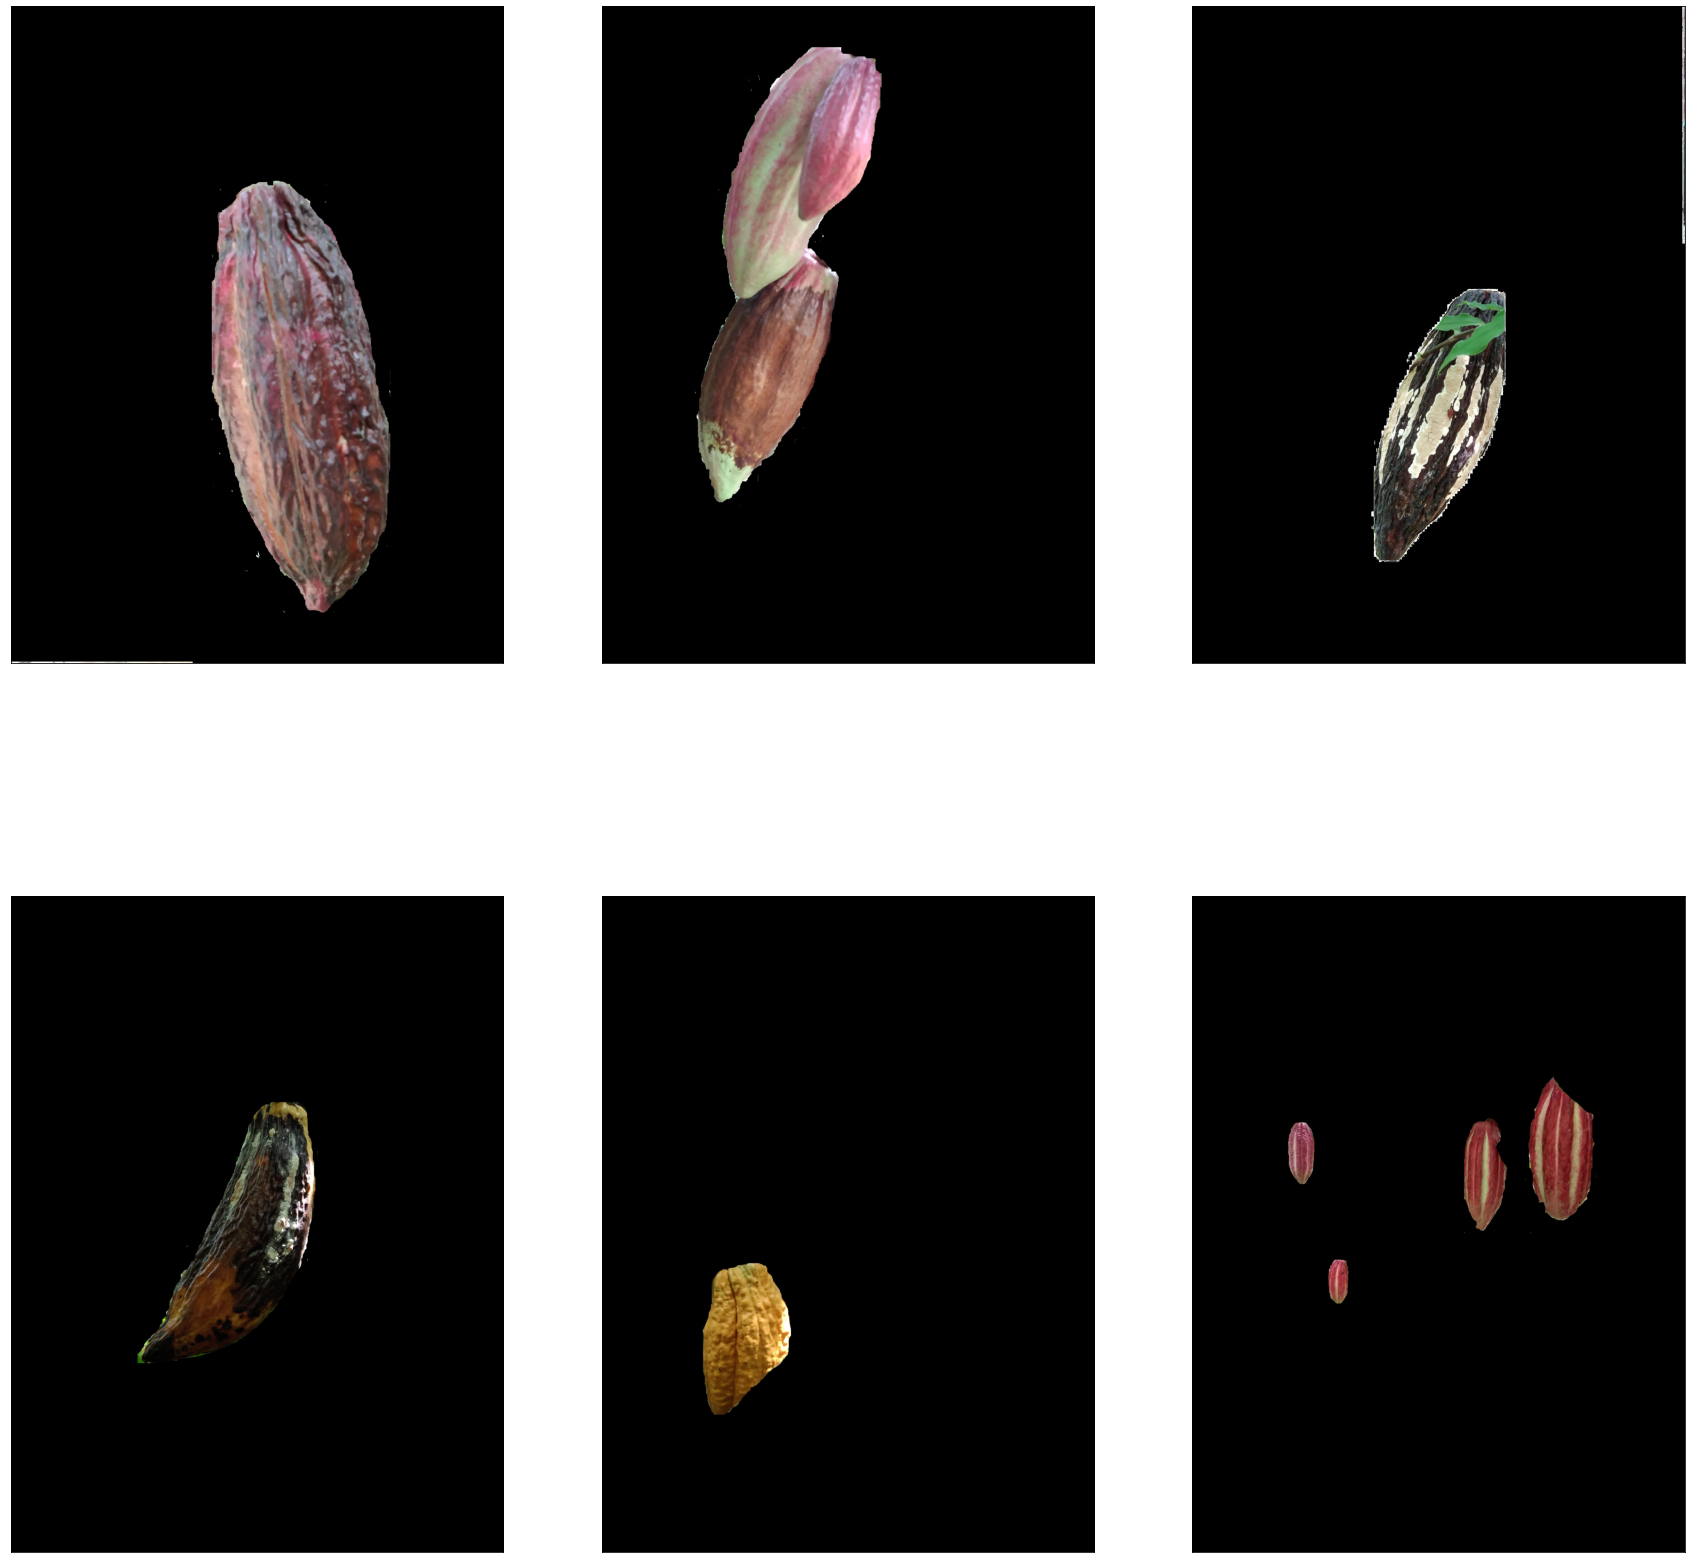

In [6]:
## Se unen todas las imágenes y se haca un redimensionamiento
imagenes = imag_fito+imag_monilia+imag_healty
                                

plt.figure(figsize=(30, 30))
for i in range(len(imagenes)):
    plt.subplot(math.ceil(len(imagenes)/3),3,i+1),plt.imshow(imagenes[i])
    plt.xticks([]),plt.yticks([])

plt.show()


<Figure size 2160x2160 with 0 Axes>

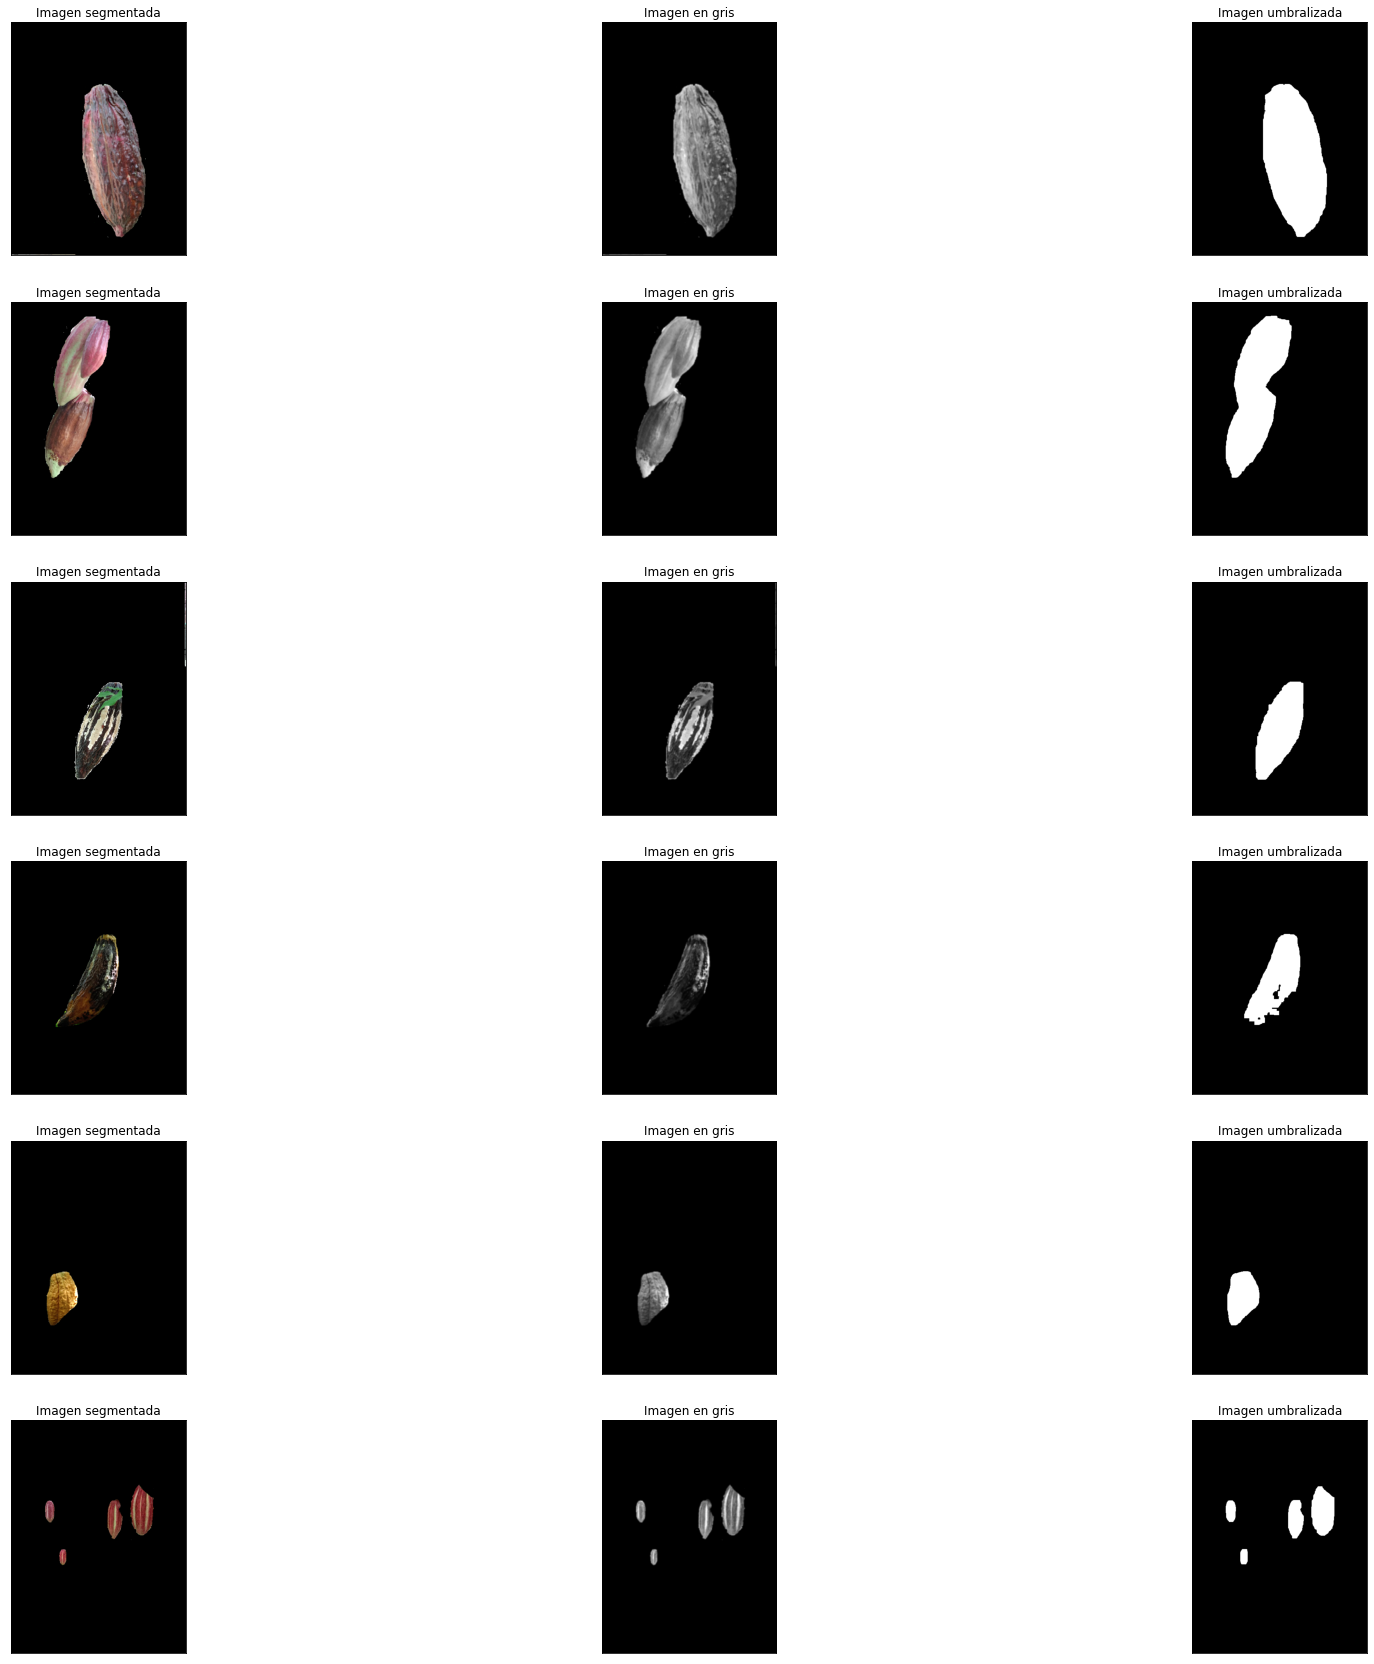

In [6]:
## Preprocesamiento

plt.figure(figsize=(30, 30))

elemento_rectangular = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))
kernel=elemento_rectangular


image_blur = []
img_gray_blur = []
contours=[]
img_threshold=[]
img_threshold_morphFilter=[]
img_threshold_morphFilter_erosion=[]
img_threshold_morphFilter_erosion_dilatacion=[]
img_contornos_polylines=[]
img_contornos_drawContours=[]
cnt = []
minSize=512

for i in range(len(imagenes)):
    
    # Reducción de Escala

    n=imagenes[i].shape[0]
    m=imagenes[i].shape[1]
    

    escala= (math.ceil(min(n,m)/minSize))**(-1)
    imagenes[i]= cv2.resize(imagenes[i], None, fx=escala, fy= escala,\
                                interpolation= cv2.INTER_LINEAR)
    
    # Filtro GaussianBlur
    image_blur.append(cv2.GaussianBlur(imagenes[i],(5,5),0))

    # Conversión a escala de grises
    img_gray_blur.append(cv2.cvtColor(image_blur[i], cv2.COLOR_RGB2GRAY)) 

    # Umbralización 'adaptativa' con THRESH_OTSU
    # img_thr_THRESH_OTSU= cv2.threshold(img_gray_blur[i],0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    # Umbralización con threshold
    img_thr_threshold= cv2.threshold(img_gray_blur[i],10,255,0)[1]
    
    img_threshold.append(img_thr_threshold)

    # Filtrado morfológico
    opening = cv2.morphologyEx(img_threshold[i],cv2.MORPH_OPEN,kernel, iterations = 1)
    closing= cv2.morphologyEx(opening,cv2.MORPH_CLOSE,kernel, iterations = 1)

    img_threshold_morphFilter.append(closing)

    # Erosiones
    n_erosiones=math.ceil((math.log(img_gray_blur[i].shape[0]*img_gray_blur[i].shape[1]))/3)
    img_threshold_morphFilter_erosion.append(\
        cv2.erode(img_threshold_morphFilter[i],kernel,iterations = n_erosiones))

    # Dilataciones
    n_dilataciones=n_erosiones
    img_threshold_morphFilter_erosion_dilatacion.append(cv2.dilate(img_threshold_morphFilter_erosion[i],kernel,\
    iterations = n_dilataciones))


    # Se hallan los contornos [2]
    contours.append(cv2.findContours(\
        img_threshold_morphFilter_erosion_dilatacion[i],cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)[0])
    
    cnt.append(contours[i][0]) 
    
    
    img_contornos_polylines.append(imagenes[i].copy())
    img_contornos_drawContours.append(imagenes[i].copy())

    #Dibuja contornos [2]
    cv2.polylines(img_contornos_polylines[i], contours[i], 1, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)

    cv2.drawContours(img_contornos_drawContours[i], contours=contours[i],\
        contourIdx=-1, color=(0, 0, 255), thickness=2, lineType=cv2.LINE_AA)

plt.figure(figsize=(30, 30))
contador=0
for i in range(0,len(imagenes)*3,3):
    plt.subplot(len(imagenes),3,i+1),plt.imshow(imagenes[contador])
    plt.title('Imagen segmentada'),plt.xticks([]),plt.yticks([])

    plt.subplot(len(imagenes),3,i+2),plt.imshow(img_gray_blur[contador],cmap=plt.cm.gray)
    plt.title('Imagen en gris'),plt.xticks([]),plt.yticks([])

    plt.subplot(len(imagenes),3,i+3),plt.imshow(img_threshold_morphFilter_erosion_dilatacion[contador],cmap=plt.cm.gray)
    plt.title('Imagen umbralizada'),plt.xticks([]),plt.yticks([])

    contador+=1
contador=0
plt.show()


3 Contornos

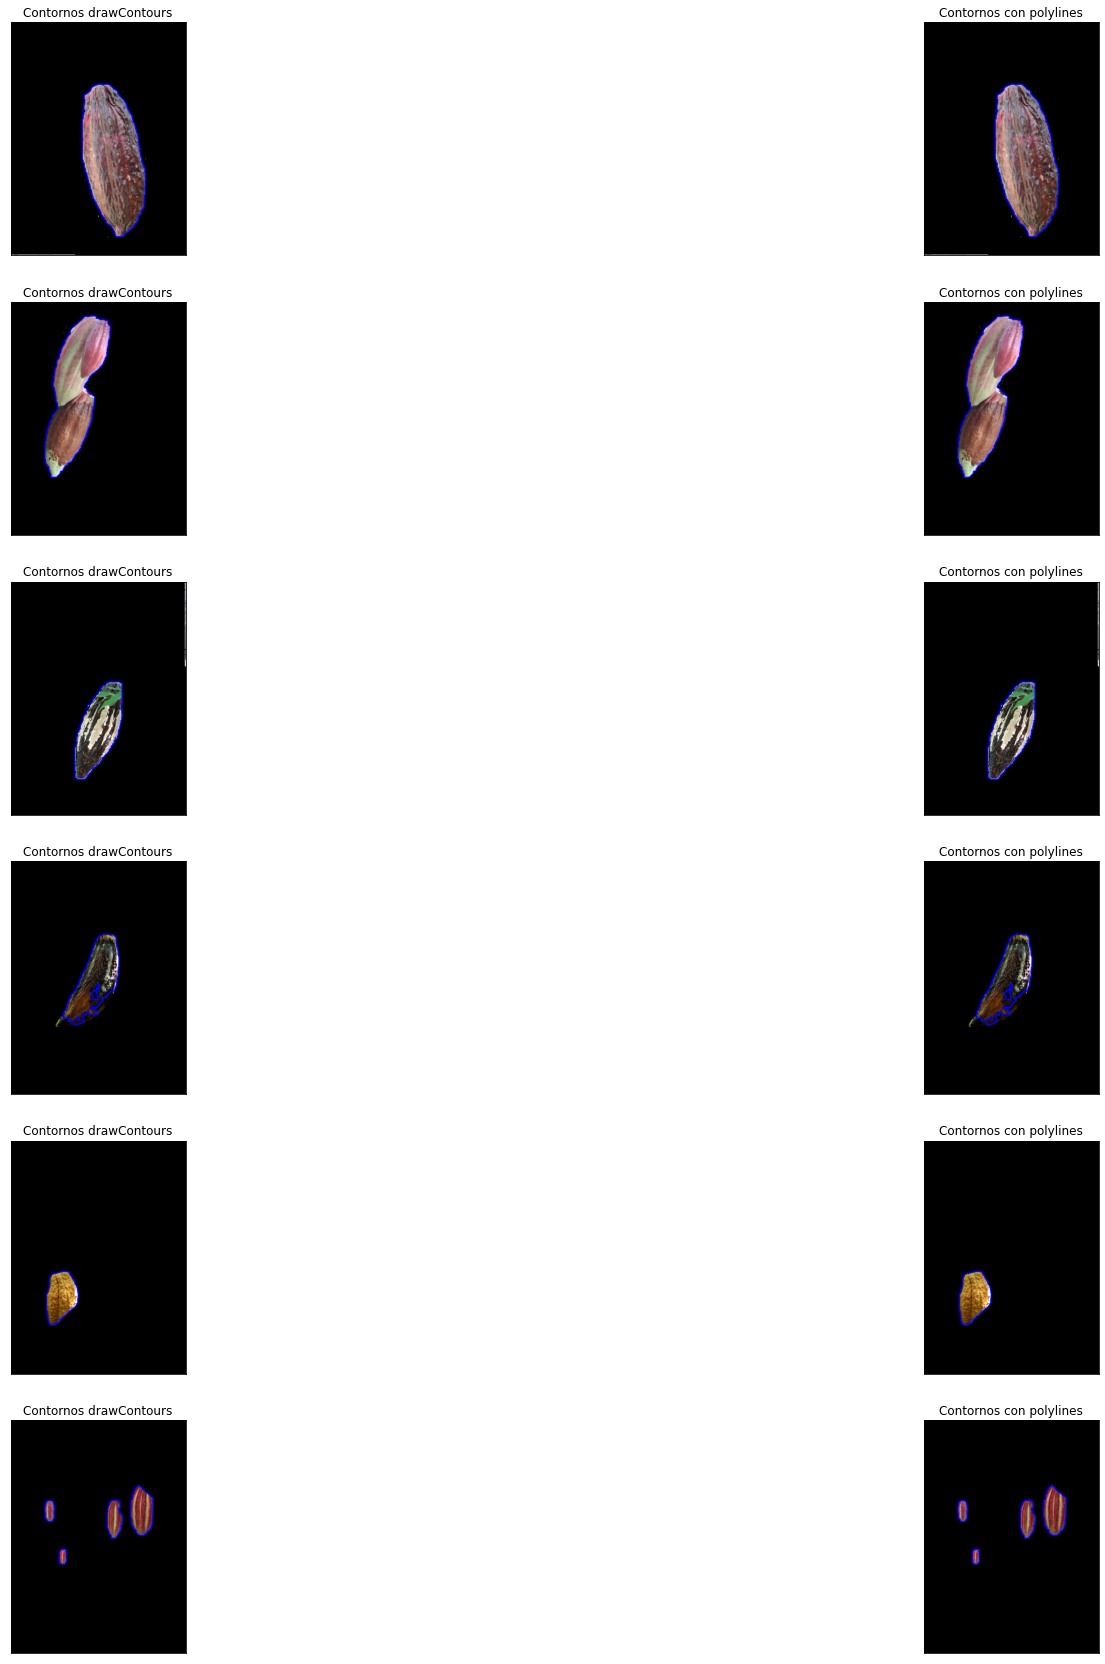

In [7]:
# Se dibujan los contornos
n_total=len(imagenes)

plt.figure(figsize=(30, 30))
for i in range(0,n_total*2,2):
    plt.subplot(n_total,2,i+1),plt.imshow(img_contornos_drawContours[contador])
    plt.title('Contornos drawContours'), plt.xticks([]), plt.yticks([])
    
    plt.subplot(n_total,2,i+2),plt.imshow(img_contornos_polylines[contador])
    plt.title('Contornos con polylines'), plt.xticks([]), plt.yticks([])
    
    contador+=1

contador=0
plt.show()




### Extracción de características

In [8]:
n_imagenes=n_total
n_caracteristicas=1 # Registra el número total de características

caracteristicas=[]
momentos = []


# Nombre de las características deseadas
nombre_caracteristicas=np.array(['Moda R','Moda G','Moda B','Moda Gris','Mediana R','Mediana G','Mediana B','Mediana Gris'\
    ,'Media R','Media G','Media B','Media Gris','Desviacion estandar R','Desviacion estandar G','Desviacion estandar B','Desviacion estandar Gris'\
        ,'min R','min G','min B','min Gris','max R','max G','max B','max Gris','Momento00', 'Momento10','Momento01','MomentosHU1','MomentosHU2','MomentosHU3','MomentosHU4','MomentosHU5','MomentosHU6','MomentosHU7','Area','Perimetro','CentroideX','CentroideY'])    


for j in range(n_imagenes):

    # Eliminación de partes que no pertenecen al contorno

    n=imagenes[j].shape[0]
    m=imagenes[j].shape[1]
    c=imagenes[j].shape[2]


    # Extracción de RGB
    aux_imagenes=imagenes[j].copy()

    imagenes_R=aux_imagenes[:,:,0]
    imagenes_G=aux_imagenes[:,:,1]
    imagenes_B=aux_imagenes[:,:,2]

    # Se pone en una sola columna la matriz nxm
    imagenes_R.shape=(n*m)
    imagenes_G.shape=(n*m)
    imagenes_B.shape=(n*m)

    img_threshold_morphFilter_erosion_dilatacion[j].shape=(n*m)

    # Se colocan como cero los pixeles que no están en umbralización

    for i in range(n*m):
        if img_threshold_morphFilter_erosion_dilatacion[j][i]==0:
            imagenes_R[i]=0
            imagenes_G[i]=0
            imagenes_B[i]=0

    # Se reajusta el tamaño original
    imagenes_R.shape=(n,m)
    imagenes_G.shape=(n,m)
    imagenes_B.shape=(n,m)
    img_threshold_morphFilter_erosion_dilatacion[j].shape=(n,m)

    # Se arma la nueva imagenesn
    new_imagenes=imagenes[j].copy()
    new_imagenes[:,:,0]=imagenes_R
    new_imagenes[:,:,1]=imagenes_G
    new_imagenes[:,:,2]=imagenes_B

    new_imagenes_gray=cv2.cvtColor(new_imagenes, cv2.COLOR_RGB2GRAY)
   


    
    n=new_imagenes.shape[0]
    m=new_imagenes.shape[1]
    c=new_imagenes.shape[2]


    # Extracción de RGB
    aux_imagenes=new_imagenes.copy()
    aux_new_imagenes_gray=new_imagenes_gray.copy()

    imagenes_R=aux_imagenes[:,:,0]
    imagenes_G=aux_imagenes[:,:,1]
    imagenes_B=aux_imagenes[:,:,2]

    # Se pone en una sola columna la matriz nxm
    imagenes_R.shape=(n*m)
    imagenes_G.shape=(n*m)
    imagenes_B.shape=(n*m)
    aux_new_imagenes_gray.shape=(n*m)

    # print(f'Vector R inicial {imagenes_R.shape}')
    # print(f'Vector G inicial {imagenes_G.shape}')
    # print(f'Vector B inicial {imagenes_B.shape}')
    # print(f'Vector gris inicial {aux_new_imagenes_gray.shape}')

    imagenes_R_sinNegro=[]
    imagenes_G_sinNegro=[]
    imagenes_B_sinNegro=[]
    new_imagenes_gray_sinNegro=[]

    # Se colocan como cero los pixeles que no están en umbralización

    for i in range(n*m):
        if imagenes_R[i]!=0:
            imagenes_R_sinNegro.append(imagenes_R[i])
        if imagenes_G[i]!=0:
            imagenes_G_sinNegro.append(imagenes_G[i])
        if imagenes_B[i]!=0:
            imagenes_B_sinNegro.append(imagenes_B[i])
        
        if aux_new_imagenes_gray[i]!=0:
            new_imagenes_gray_sinNegro.append(aux_new_imagenes_gray[i])
        

    # print(f'Vector R final {len(imagenes_R_sinNegro)}')
    # print(f'Vector G final {len(imagenes_G_sinNegro)}')
    # print(f'Vector B final {len(imagenes_B_sinNegro)}')
    # print(f'Vector gris final {len(new_imagenes_gray_sinNegro)}')


    aux_caracteristicas=[]

    # Extracción de moda en RGB y grises
    aux_caracteristicas.append(st.mode(imagenes_R_sinNegro)[0][0])
    aux_caracteristicas.append(st.mode(imagenes_G_sinNegro)[0][0])
    aux_caracteristicas.append(st.mode(imagenes_B_sinNegro)[0][0])
    aux_caracteristicas.append(st.mode(new_imagenes_gray_sinNegro)[0][0])


    # Extracción de mediana en RGB y grises
    aux_caracteristicas.append(np.median(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.median(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.median(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.median(new_imagenes_gray_sinNegro))

    # Extracción de media en RGB y grises
    aux_caracteristicas.append(np.mean(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.mean(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.mean(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.mean(new_imagenes_gray_sinNegro))

    # Extracción de Desviación estandar en RGB y grises
    aux_caracteristicas.append(np.std(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.std(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.std(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.std(new_imagenes_gray_sinNegro))


    # Extracción de mínimo en RGB y grises
    aux_caracteristicas.append(np.amin(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.amin(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.amin(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.amin(new_imagenes_gray_sinNegro))

    # Extracción de máximo en RGB y grises
    aux_caracteristicas.append(np.amax(imagenes_R_sinNegro))
    aux_caracteristicas.append(np.amax(imagenes_G_sinNegro))
    aux_caracteristicas.append(np.amax(imagenes_B_sinNegro))
    aux_caracteristicas.append(np.amax(new_imagenes_gray_sinNegro))

    #Momentos
    momentos.append(cv2.moments(cnt[j]))
     #Momento00
    aux_caracteristicas.append(momentos[j]['m00'])
     #Momento10
    aux_caracteristicas.append(momentos[j]['m10'])
     #Momento01
    aux_caracteristicas.append(momentos[j]['m01'])
    
    #MomentosHU
    
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[0][0])
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[1][0])
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[2][0])
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[3][0])
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[4][0])
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[5][0])
    aux_caracteristicas.append(cv2.HuMoments(momentos[j])[6][0])
    
    #Area
    aux_caracteristicas.append(cv2.contourArea(cnt[j]))
    
    #Perimetro
    aux_caracteristicas.append(cv2.arcLength(cnt[j],True))
    
    #CentroideX
    aux_caracteristicas.append(int(momentos[j]["m10"] / momentos[j]["m00"]))
    
    #CentroideY
    aux_caracteristicas.append(int(momentos[j]["m01"] / momentos[j]["m00"]))
    
    n_caracteristicas=len(aux_caracteristicas)
    caracteristicas+=aux_caracteristicas
    
    
caracteristicas=np.array(caracteristicas)
caracteristicas.shape=(n_imagenes,n_caracteristicas)


### Estandarización

Se debe estandarizar porque los componentes dependen de las escalas y así las variables tienen diferentes rangos. Para pasar a los mismos rangos se suelen pasar los datos a media cero y varianza uno.[3]

In [9]:
# Estandarización [4]

A = n_imagenes
B = n_caracteristicas

m = np.mean(caracteristicas, axis=0, dtype=np.double)
sigma = np.std(caracteristicas, axis=0, dtype=np.double)
# print(f'media características\n\n{m} \n\nDesviación Estándar características\n{sigma}')

# Eliminación de características con sigma=0 [5]
aux_caracteristicas=caracteristicas
aux_nombre_caracteristicas=nombre_caracteristicas

posicionesSigmaCero=[]

# Se halla las posiciones donde sigma es cero
for i in range(len(sigma)):
    if sigma[i]==0:
        posicionesSigmaCero.append(i)

# Se eliminan las caracteristicas con las posiciones de sigma cero

aux_caracteristicas=np.delete(aux_caracteristicas, np.array(posicionesSigmaCero), 1)
aux_nombre_caracteristicas=np.delete(aux_nombre_caracteristicas,np.array(posicionesSigmaCero), -1)

A = aux_caracteristicas.shape[0]
B = aux_caracteristicas.shape[1]


aux_m = np.mean(aux_caracteristicas, axis=0, dtype=np.double)
aux_sigma = np.std(aux_caracteristicas, axis=0, dtype=np.double)
# print(f'media de características sin las que tenían desviación estandar cero\n\n{m}\
#  \nDesviación Estándar características sin las que tenían desviación estandar cero\n\n{sigma}')

# print(f'Características sin desviación estandar cero\n{aux_nombre_caracteristicas}')

print ("\nDatos Modificados")
aux = aux_m/aux_sigma
DatosM = aux_caracteristicas/aux_sigma - aux


m = np.mean(DatosM, axis=0)
print ("\nMedia")
print (m)
sigma = np.std(DatosM, axis=0)
print ("\nDesviación Estándar")
print (sigma)

covM = np.cov(DatosM.transpose())
print ("\nMatriz de Dispersión")

disM = (A-1)*covM
disM=np.absolute(disM)
print (disM)
eigVal2, eigVec2 = np.linalg.eig(disM) 
print ("\nValores propios M_Dis")
print (eigVal2)
print ("\nVectores propios M_Dis") 
print (eigVec2) # Vectores propios organizados por columnas en una matriz


D_S_inicial=np.linalg.det(disM)
print (f'Determinante inicial de S \n {D_S_inicial}')

caracteristicasEstandarizadas=DatosM # Características Finales estandarizadas



Datos Modificados

Media
[-7.40148683e-17 -2.03540888e-16 -7.40148683e-17  3.70074342e-17
 -2.96059473e-16  2.59052039e-16  1.48029737e-16 -1.85037171e-16
  0.00000000e+00  4.44089210e-16 -1.85037171e-16 -3.70074342e-16
  7.40148683e-17 -5.92118946e-16  0.00000000e+00 -2.96059473e-16
  2.36847579e-15 -7.10542736e-15  0.00000000e+00  1.11022302e-16
 -3.70074342e-17 -2.96059473e-16  3.70074342e-17  3.70074342e-17
 -9.25185854e-17 -3.70074342e-17 -9.25185854e-18 -8.32667268e-17
  0.00000000e+00 -3.70074342e-17 -2.22044605e-16  1.48029737e-16]

Desviación Estándar
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]

Matriz de Dispersión
[[6.         5.80027861 0.717262   ... 1.95046295 0.04419431 0.33489097]
 [5.80027861 6.         1.01799534 ... 1.98761812 0.65312823 0.97324629]
 [0.717262   1.01799534 6.         ... 4.91829715 3.54090308 4.03901762]
 ...
 [1.95046295 1.98761812 4.91829715 ... 6.         3.41787336 4.08294992]
 [0.04419431 0

Nótese que en los datos estandarizados la media es cercana a cero y la desviación estandar es uno.

## Implementación de métodos de clasifición no supervisadas Distancias encadenadas o Max-min.

### Algoritmo Distancias encadenas (chain-map)

Los siguiente pasos son tomados de Medina [6]:

1. Se eligen los vectores a clasificar. Para este caso se van a colocar los mismos que propone Medina [6] pero en el proyecto se van a usar los casos en los cuales sean la matriz de características estandarizada. 

In [10]:
Xi=np.array([[1,1],[1,2],[2,4],[3,5],[4,3],[5,2],[5,3]])

2. Elegir una característica al azar

In [11]:
# Se elige una posición al azar mediante la función random.randint [7]
#nRandom=np.random.randint(Xi.shape[0])
nRandom=0 #Caso ejemplo que funciona! 
print(f'Posición al azar {nRandom}')

# Vector de características en la posición al azar
# XRandom=Xi[nRandom]
XRandom=Xi[nRandom]
print(f'Característica al azar {XRandom}')


# Se elimina la característica al azar
aux_Xi=Xi
aux_Xi=np.delete(Xi,nRandom,0)

print(f'Características restantes\n {aux_Xi}')

Posición al azar 0
Característica al azar [1 1]
Características restantes
 [[1 2]
 [2 4]
 [3 5]
 [4 3]
 [5 2]
 [5 3]]


3. Organizar según la distancia Euclidea 

In [12]:
# Organización
def disEuc(v1,v2):
    '''
    Calcula la distancia euclidea [8]
    '''
    return np.linalg.norm(v1-v2)

def organizadorCaracteristicas(Xorganizada,Xi):
    ''' 
    Xorganizada: Característica elegida al azar
    Xi: Vector de características sin la elegida al azar
    '''
    # Condición para salir de la función recursiva
    if Xi.shape[0]==1:

        # Se le agrega la última fila a Xorganizada [9]
        Xorganizada=np.append(Xorganizada,Xi,axis=0)
        return Xorganizada
    
    # Se elige la última fila de Xorganizada 
    UltimaFilaXOrganizada=Xorganizada.shape[0]-1
    
 
 
    # Se halla la primera distancia Euclídea [10]
    
    disEucMin=disEuc(Xi[0],Xorganizada[UltimaFilaXOrganizada])
    nDisEucMin=0

    # Se itera hasta hallar la menor distancia Euclídea
    for i in range(1,len(Xi)):

        disEucX=disEuc(Xi[i],Xorganizada[UltimaFilaXOrganizada])
        if disEucMin>disEucX:
            disEucMin=disEucX
            nDisEucMin=i

    # Se agrega una la característica con menor distancia Euclídea a Xorganizada
    Xorganizada=np.append(Xorganizada,[Xi[nDisEucMin]],axis=0)
    
    # Se borra de Xi el menor vector de distancia Euclídea
    Xi=np.delete(Xi,nDisEucMin,axis=0)

    # Se realiza un función recursiva
    return organizadorCaracteristicas(Xorganizada,Xi)

Xorganizadas=organizadorCaracteristicas(np.array([XRandom]),aux_Xi)
Xorganizadas

array([[1, 1],
       [1, 2],
       [2, 4],
       [3, 5],
       [4, 3],
       [5, 3],
       [5, 2]])

4. Sucesión de distancias euclídeas relativas



In [13]:
distanciasEuclideas=np.zeros(Xorganizadas.shape[0]-1)

for i in range(0,Xorganizadas.shape[0]-1):
    distanciasEuclideas[i]=disEuc(Xorganizadas[i],Xorganizadas[i+1])



5. Histograma de distancia Euclídea en función del índice de la distancia

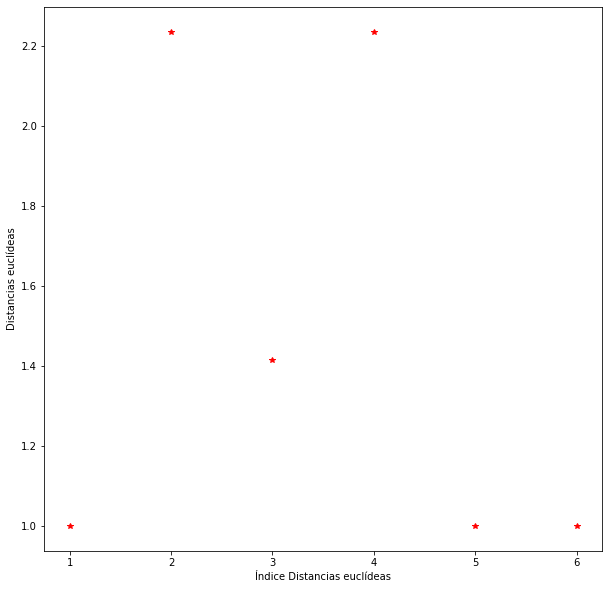

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(range(1,Xorganizadas.shape[0]),distanciasEuclideas,'r*')
plt.ylabel('Distancias euclídeas'),plt.xlabel('Índice Distancias euclídeas')
plt.show()


# plt.figure(figsize=(10, 10))
# plt.plot(range(1,Xorganizadas.shape[0]),distanciasEuclideas)
# plt.plot(range(1,Xorganizadas.shape[0]),2*distanciasEuclideas)
# plt.ylabel('some numbers')
# plt.legend(['hola','chao'])
# plt.show()

6. Elección del umbral de clase

Por favor ingrese el umbral:  2


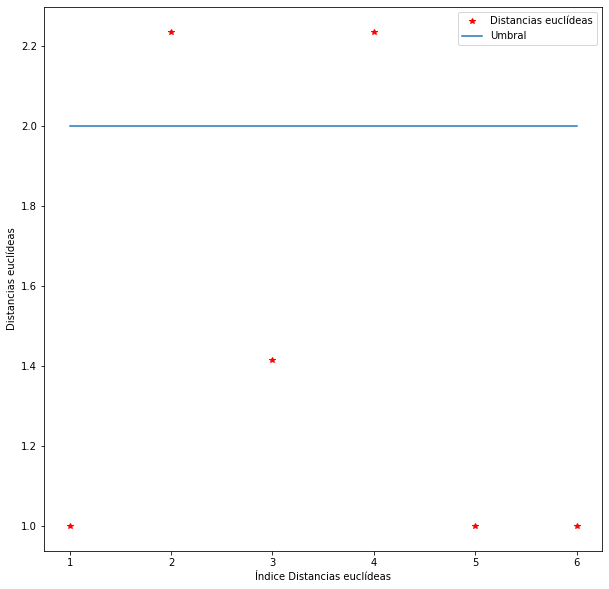

In [15]:
# Se ingresa el umbral
while True:
    # Errores y excepciones [10]
    try: 
        # Entrada de datos [11]
        umbralDeClase= float(input("Por favor ingrese el umbral: "))
        break
    except ValueError:
        continue

plt.figure(figsize=(10, 10))
plt.plot(range(1,Xorganizadas.shape[0]),distanciasEuclideas,'r*')
plt.plot(range(1,Xorganizadas.shape[0]),umbralDeClase*np.ones(distanciasEuclideas.shape))
plt.ylabel('Distancias euclídeas'),plt.xlabel('Índice Distancias euclídeas')
plt.legend(['Distancias euclídeas','Umbral'])
plt.show()


7. Creación y asignación de clases

In [16]:
# Lista de clases
clases=[]
#print('Clase')

# Lista de características de una sola clase
aux_clases=[]


# Ciclo para extraer características
# Prioridad de simbolos [12] citado por [13]
for i in range(len(distanciasEuclideas)):
    if i!=0:
        if distanciasEuclideas[i]>=umbralDeClase and distanciasEuclideas[i-1]<umbralDeClase: 
        
            #print(Xorganizadas[i])
            aux_clases.append(Xorganizadas[i].tolist()) # Array to list [14]
            clases.append(aux_clases)
            
            #print('Clase')
            aux_clases=[]

            continue
    else:
        if distanciasEuclideas[i]>=umbralDeClase:
            #print(Xorganizadas[i])
            aux_clases.append(Xorganizadas[i].tolist()) # Array to list [14]
            clases.append(aux_clases)
            
            #print('Clase')
            aux_clases=[]

            continue
    #print(Xorganizadas[i])
    aux_clases.append(Xorganizadas[i].tolist())

#print(Xorganizadas[len(distanciasEuclideas)])
aux_clases.append(Xorganizadas[len(distanciasEuclideas)].tolist())
clases.append(aux_clases)

aux_clases=[]

for clusters in clases:
    print(f'{clusters}')

# Anecdotas
# No usar aux_clases.clear()

[[1, 1], [1, 2]]
[[2, 4], [3, 5]]
[[4, 3], [5, 3], [5, 2]]


Ya se ensayó con un ejercicio realizado en clase, ahora si se puede implementar la función.

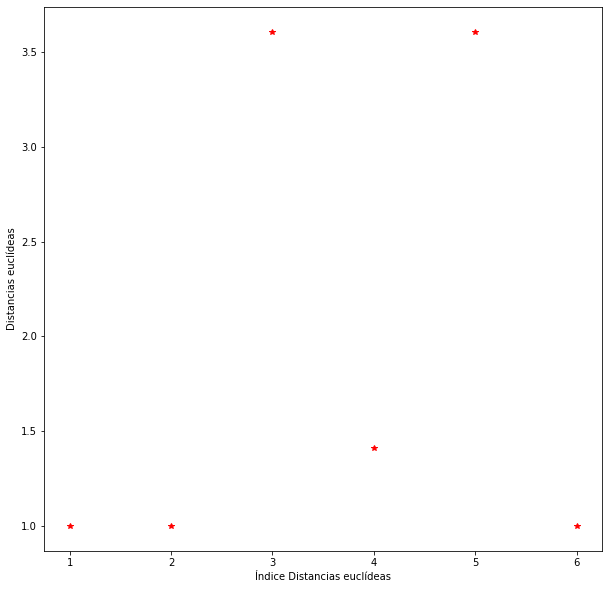

Por favor ingrese el umbral:  3


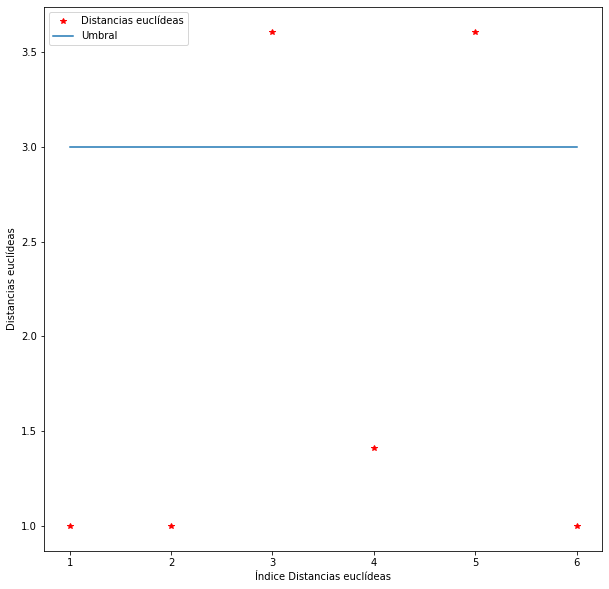

[[4, 3], [5, 3], [5, 2]]
[[2, 4], [3, 5]]
[[1, 2], [1, 1]]


In [17]:
def algoritmoDistanciasEncadenadas(Xi):
    '''
    Xi: Vector de características
    '''

    # Se elige una posición al azar mediante la función random.randint 
    nRandom=np.random.randint(Xi.shape[0])
    # nRandom=0
    # Vector de características en la posición al azar
    XRandom=Xi[nRandom]
    Xi=np.delete(Xi,nRandom,0)

    def disEuc(v1,v2):
        '''
        Calcula la distancia euclidea [8]

        v1, v2: Vectores para hallar la normal
        '''
        return np.linalg.norm(v1-v2)

    def organizadorCaracteristicas(Xorganizada,Xi):
        ''' 
        Organiza las características

        Xorganizada: Característica elegida al azar
        Xi: Vector de características sin la elegida al azar
        '''
        # Condición para salir de la función recursiva
        if Xi.shape[0]==1:

            # Se le agrega la última fila a Xorganizada [9]
            Xorganizada=np.append(Xorganizada,Xi,axis=0)
            return Xorganizada
        
        # Se elige la última fila de Xorganizada 
        UltimaFilaXOrganizada=Xorganizada.shape[0]-1
        
    
    
        # Se halla la primera distancia Euclídea [10]
        
        disEucMin=disEuc(Xi[0],Xorganizada[UltimaFilaXOrganizada])
        nDisEucMin=0

        # Se itera hasta hallar la menor distancia Euclídea
        for i in range(1,len(Xi)):

            disEucX=disEuc(Xi[i],Xorganizada[UltimaFilaXOrganizada])
            if disEucMin>disEucX:
                disEucMin=disEucX
                nDisEucMin=i

        # Se agrega una la característica con menor distancia Euclídea a Xorganizada
        Xorganizada=np.append(Xorganizada,[Xi[nDisEucMin]],axis=0)
        
        # Se borra de Xi el menor vector de distancia Euclídea
        Xi=np.delete(Xi,nDisEucMin,axis=0)

        # Se realiza un función recursiva
        return organizadorCaracteristicas(Xorganizada,Xi)

    Xorganizadas=organizadorCaracteristicas(np.array([XRandom]),Xi)

    # Se calculan las distancias Euclideas
    distanciasEuclideas=np.zeros(Xorganizadas.shape[0]-1)

    for i in range(0,Xorganizadas.shape[0]-1):
        distanciasEuclideas[i]=disEuc(Xorganizadas[i],Xorganizadas[i+1])

    plt.figure(figsize=(10, 10))
    plt.plot(range(1,Xorganizadas.shape[0]),distanciasEuclideas,'r*')
    plt.ylabel('Distancias euclídeas'),plt.xlabel('Índice Distancias euclídeas')
    plt.show()

    # Se ingresa el umbral
    while True:
        # Errores y excepciones [10]
        try: 
            # Entrada de datos [11]
            umbralDeClase= float(input("Por favor ingrese el umbral: "))
            break
        except ValueError:
            continue

    plt.figure(figsize=(10, 10))
    plt.plot(range(1,Xorganizadas.shape[0]),distanciasEuclideas,'r*')
    plt.plot(range(1,Xorganizadas.shape[0]),umbralDeClase*np.ones(distanciasEuclideas.shape))
    plt.ylabel('Distancias euclídeas'),plt.xlabel('Índice Distancias euclídeas')
    plt.legend(['Distancias euclídeas','Umbral'])
    plt.show()

    # Lista de clases
    clases=[]
    #print('Clase')

    # Lista de características de una sola clase
    aux_clases=[]


    # Ciclo para extraer características
    # Prioridad de simbolos [12] citado por [13]
    for i in range(len(distanciasEuclideas)):
        if i!=0:
            if distanciasEuclideas[i]>=umbralDeClase and distanciasEuclideas[i-1]<umbralDeClase: 
            
                #print(Xorganizadas[i])
                aux_clases.append(Xorganizadas[i].tolist()) # Array to list [14]
                clases.append(aux_clases)
                
                #print('Clase')
                aux_clases=[]

                continue
        else:
            if distanciasEuclideas[i]>=umbralDeClase:
                #print(Xorganizadas[i])
                aux_clases.append(Xorganizadas[i].tolist()) # Array to list [14]
                clases.append(aux_clases)
                
                #print('Clase')
                aux_clases=[]

                continue
        #print(Xorganizadas[i])
        aux_clases.append(Xorganizadas[i].tolist())

    #print(Xorganizadas[len(distanciasEuclideas)])
    aux_clases.append(Xorganizadas[len(distanciasEuclideas)].tolist())
    clases.append(aux_clases)

    aux_clases=[]


    return clases

clasesFinales=algoritmoDistanciasEncadenadas(np.array([[1,1],[1,2],[2,4],[3,5],[4,3],[5,2],[5,3]]))

for clusters in clasesFinales:
    print(clusters)

## 2. Implementar en python, como una función de OpenCV, el algoritmo N-dimensional de clasificación no supervisado ISODATA. Un código para imágenes (2-dimensiones)

In [38]:
# Tomado de [15]
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# Copyright 2012 - 2013
# Matías Herranz <matiasherranz@gmail.com>
# Joaquín Tita <joaquintita@gmail.com>
#
# https://github.com/PyRadar/pyradar
#
# This library is free software; you can redistribute it and/or
# modify it under the terms of the GNU Lesser General Public
# License as published by the Free Software Foundation; either
# version 3 of the License, or (at your option) any later version.
#
# This library is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the GNU
# Lesser General Public License for more details.
#
# You should have received a copy of the GNU Lesser General Public
# License along with this library. If not, see <http://www.gnu.org/licenses/>.



#from pyradar.utils import take_snapshot


def initialize_parameters(parameters=None):
    """Auxiliar function to set default values to all the parameters not
    given a value by the user.

    """
    parameters = {} if not parameters else parameters

    def safe_pull_value(parameters, key, default):
        return parameters.get(key, default)

    # number of clusters desired
    K = safe_pull_value(parameters, 'K', 5)

    # maximum number of iterations
    I = safe_pull_value(parameters, 'I', 100)

    # maximum of number of pairs of clusters which can be merged
    P = safe_pull_value(parameters, 'P', 4)

    # threshold value for  minimum number of samples in each cluster
    # (discarding clusters)
    THETA_M = safe_pull_value(parameters, 'THETA_M', 10)

    # threshold value for standard deviation (for split)
    THETA_S = safe_pull_value(parameters, 'THETA_S', 1)
    # threshold value for pairwise distances (for merge)
    THETA_C = safe_pull_value(parameters, 'THETA_C', 20)

    # percentage of change in clusters between each iteration
    #(to stop algorithm)
    THETA_O = 0.05

    #can use any of both fixed or random
    # number of starting clusters
    #k = np.random.randint(1, K)
    k = safe_pull_value(parameters, 'k', K)

    ret = locals()
    ret.pop('safe_pull_value')
    ret.pop('parameters')
    globals().update(ret)


def quit_low_change_in_clusters(centers, last_centers, iter):
    """Stop algorithm by low change in the clusters values between each
    iteration.

    :returns: True if should stop, otherwise False.

    """
    quit = False
    if centers.shape == last_centers.shape:
        thresholds = np.abs((centers - last_centers) / (last_centers + 1))

        if np.all(thresholds <= THETA_O):  # percent of change in [0:1]
            quit = True
#            print "Isodata(info): Stopped by low threshold at the centers."
#            print "Iteration step: %s" % iter

    return quit


def merge_clusters(img_class_flat, centers, clusters_list):
    """
    Merge by pair of clusters in 'below_threshold' to form new clusters.
    """
    pair_dists = compute_pairwise_distances(centers)

    first_p_elements = pair_dists[:P]

    below_threshold = [(c1, c2) for d, (c1, c2) in first_p_elements
                                if d < THETA_C]

    if below_threshold:
        k = centers.size
        count_per_cluster = np.zeros(k)
        to_add = np.array([])  # new clusters to add
        to_delete = np.array([])  # clusters to delete

        for cluster in range(0, k):
            result = np.where(img_class_flat == clusters_list[cluster])
            indices = result[0]
            count_per_cluster[cluster] = indices.size

        for c1, c2 in below_threshold:
            c1_count = float(count_per_cluster[c1]) + 1
            c2_count = float(count_per_cluster[c2])
            factor = 1.0 / (c1_count + c2_count)
            weight_c1 = c1_count * centers[c1]
            weight_c2 = c2_count * centers[c2]

            value = round(factor * (weight_c1 + weight_c2))

            to_add = np.append(to_add, value)
            to_delete = np.append(to_delete, [c1, c2])

        #delete old clusters and their indices from the availables array
        centers = np.delete(centers, to_delete)
        clusters_list = np.delete(clusters_list, to_delete)

        #generate new indices for the new clusters
        #starting from the max index 'to_add.size' times
        start = int(clusters_list.max())
        end = to_add.size + start

        centers = np.append(centers, to_add)
        clusters_list = np.append(clusters_list, xrange(start, end))

        centers, clusters_list = sort_arrays_by_first(centers, clusters_list)

    return centers, clusters_list


def compute_pairwise_distances(centers):
    """
    Compute the pairwise distances 'pair_dists', between every two clusters
    centers and returns them sorted.
    Returns:
           - a list with tuples, where every tuple has in it's first coord the
             distance between to clusters, and in the second coord has a tuple,
             with the numbers of the clusters measured.
             Output example:
                [(d1,(cluster_1,cluster_2)),
                 (d2,(cluster_3,cluster_4)),
                 ...
                 (dn, (cluster_n,cluster_n+1))]
    """
    pair_dists = []
    size = centers.size

    for i in range(0, size):
        for j in range(0, size):
            if i > j:
                d = np.abs(centers[i] - centers[j])
                pair_dists.append((d, (i, j)))

    #return it sorted on the first elem
    return sorted(pair_dists)


def split_clusters(img_flat, img_class_flat, centers, clusters_list):
    """
    Split clusters to form new clusters.
    """
    assert centers.size == clusters_list.size, \
        "ERROR: split() centers and clusters_list size are different"

    delta = 10
    k = centers.size
    count_per_cluster = np.zeros(k)
    stddev = np.array([])

    avg_dists_to_clusters = compute_avg_distance(img_flat, img_class_flat,
                                                 centers, clusters_list)
    d = compute_overall_distance(img_class_flat, avg_dists_to_clusters,
                                 clusters_list)

    # compute all the standard deviation of the clusters
    for cluster in range(0, k):
        indices = np.where(img_class_flat == clusters_list[cluster])[0]
        count_per_cluster[cluster] = indices.size
        value = ((img_flat[indices] - centers[cluster]) ** 2).sum()
        value /= count_per_cluster[cluster]
        value = np.sqrt(value)
        stddev = np.append(stddev, value)

    cluster = stddev.argmax()
    max_stddev = stddev[cluster]
    max_clusters_list = int(clusters_list.max())

    if max_stddev > THETA_S:
        if avg_dists_to_clusters[cluster] >= d:
            if count_per_cluster[cluster] > (2.0 * THETA_M):
                old_cluster = centers[cluster]
                new_cluster_1 = old_cluster + delta
                new_cluster_2 = old_cluster - delta

                centers = np.delete(centers, cluster)
                clusters_list = np.delete(clusters_list, cluster)

                centers = np.append(centers, [new_cluster_1, new_cluster_2])
                clusters_list = np.append(clusters_list, [max_clusters_list,
                                          (max_clusters_list + 1)])

                centers, clusters_list = sort_arrays_by_first(centers,
                                                              clusters_list)

                assert centers.size == clusters_list.size, \
                   "ERROR: split() centers and clusters_list size are different"

    return centers, clusters_list


def compute_overall_distance(img_class_flat, avg_dists_to_clusters,
                             clusters_list):
    """
    Computes the overall distance of the samples from their respective cluster
    centers.
    """
    k = avg_dists_to_clusters.size
    total = img_class_flat.size
    count_per_cluster = np.zeros(k)

    for cluster in range(0, k):
        indices = np.where(img_class_flat == clusters_list[cluster])[0]
        count_per_cluster[cluster] = indices.size

    d = ((count_per_cluster / total) * avg_dists_to_clusters).sum()

    return d


def compute_avg_distance(img_flat, img_class_flat, centers, clusters_list):
    """
    Computes all the average distances to the center in each cluster.
    """
    k = centers.size
    avg_dists_to_clusters = np.array([])

    for cluster in range(0, k):
        indices = np.where(img_class_flat == clusters_list[cluster])[0]

        total_per_cluster = indices.size + 1
        sum_per_cluster = (np.abs(img_flat[indices] - centers[cluster])).sum()

        dj = (sum_per_cluster / float(total_per_cluster))

        avg_dists_to_clusters = np.append(avg_dists_to_clusters, dj)

    return avg_dists_to_clusters


def discard_clusters(img_class_flat, centers, clusters_list):
    """
    Discard clusters with fewer than THETA_M.
    """
    k = centers.shape[0]
    to_delete = np.array([])

    assert centers.size == clusters_list.size, \
        "ERROR: discard_cluster() centers and clusters_list size are different"

    for cluster in range(0, k):
        indices = np.where(img_class_flat == clusters_list[cluster])[0]
        total_per_cluster = indices.size
        if total_per_cluster <= THETA_M:
            to_delete = np.append(to_delete, cluster)

    if to_delete.size:
        new_centers = np.delete(centers, to_delete)
        new_clusters_list = np.delete(clusters_list, to_delete)
    else:
        new_centers = centers
        new_clusters_list = clusters_list

    new_centers, new_clusters_list = sort_arrays_by_first(new_centers,
                                                          new_clusters_list)

#        shape_bef = centers.shape[0]
#        shape_aft = new_centers.shape[0]
#        print "Isodata(info): Discarded %s clusters." % (shape_bef - shape_aft)

#        if to_delete.size:
#            print "Clusters discarded %s" % to_delete

    assert new_centers.size == new_clusters_list.size, \
        "ERROR: discard_cluster() centers and clusters_list size are different"

    return new_centers, new_clusters_list


def update_clusters(img_flat, img_class_flat, centers, clusters_list):
    """ Update clusters. """
    k = centers.shape[0]
    new_centers = np.array([])
    new_clusters_list = np.array([])

    assert centers.size == clusters_list.size, \
        "ERROR: update_clusters() centers and clusters_list size are different"

    for cluster in range(0, k):
        indices = np.where(img_class_flat == clusters_list[cluster])[0]
        #get whole cluster
        cluster_values = img_flat[indices]
        #sum and count the values
        sum_per_cluster = cluster_values.sum()
        total_per_cluster = (cluster_values.size) + 1
        #compute the new center of the cluster
        new_cluster = sum_per_cluster / total_per_cluster

        new_centers = np.append(new_centers, new_cluster)
        new_clusters_list = np.append(new_clusters_list, cluster)

    new_centers, new_clusters_list = sort_arrays_by_first(new_centers,
                                                          new_clusters_list)

    assert new_centers.size == new_clusters_list.size, \
        "ERROR: update_clusters() centers and clusters_list size are different"

    return new_centers, new_clusters_list


def initial_clusters(img_flat, k, method="linspace"):
    """
    Define initial clusters centers as startup.
    By default, the method is "linspace". Other method available is "random".
    """
    methods_availables = ["linspace", "random"]

    assert method in methods_availables, "ERROR: method %s is no valid." \
                                         "Methods availables %s" \
                                         % (method, methods_availables)
    if method == "linspace":
        max, min = img_flat.max(), img_flat.min()
        centers = np.linspace(min, max, k)
    elif method == "random":
        start, end = 0, img_flat.size
        indices = np.random.randint(start, end, k)
        centers = img_flat.take(indices)

    return centers


def sort_arrays_by_first(centers, clusters_list):
    """
    Sort the array 'centers' and the with indices of the sorted centers
    order the array 'clusters_list'.
    Example: centers=[22, 33, 0, 11] and cluster_list=[7,6,5,4]
    returns  (array([ 0, 11, 22, 33]), array([5, 4, 7, 6]))
    """
    assert centers.size == clusters_list.size, \
    "ERROR: sort_arrays_by_first centers and clusters_list size are not equal"

    indices = np.argsort(centers)

    sorted_centers = centers[indices]
    sorted_clusters_list = clusters_list[indices]

    return sorted_centers, sorted_clusters_list


def isodata_classification(img, parameters=None):
    """
    Classify a numpy 'img' using Isodata algorithm.
    Parameters: a dictionary with the following keys.
            - img: an input numpy array that contains the image to classify.
            - parameters: a dictionary with the initial values.
              If 'parameters' are not specified, the algorithm uses the default
              ones.
                  + number of clusters desired.
                    K = 15
                  + max number of iterations.
                    I = 100
                  + max number of pairs of clusters which can be ,erged.
                    P = 2
                  + threshold value for min number in each cluster.
                    THETA_M = 10
                  + threshold value for standard deviation (for split).
                    THETA_S = 0.1
                  + threshold value for pairwise distances (for merge).
                    THETA_C = 2
                  + threshold change in the clusters between each iter.
                    THETA_O = 0.01
        Note: if some(or all) parameters are nos providen, default values
              will be used.
    Returns:
            - img_class: a numpy array with the classification.
    """
    global K, I, P, THETA_M, THETA_S, THEHTA_C, THETA_O, k
    initialize_parameters(parameters)

    N, M = img.shape  # for reshaping at the end
    img_flat = img.flatten()
    clusters_list = np.arange(k)  # number of clusters availables

    print ("Isodata(info): Starting algorithm with %s classes" % k)
    centers = initial_clusters(img_flat, k, "linspace")

    for iter in range(0, I):
#        print "Isodata(info): Iteration:%s Num Clusters:%s" % (iter, k)
        last_centers = centers.copy()
        # assing each of the samples to the closest cluster center
        img_class_flat, dists = vq.vq(img_flat, centers)

        centers, clusters_list = discard_clusters(img_class_flat,
                                                  centers, clusters_list)
        centers, clusters_list = update_clusters(img_flat,
                                                 img_class_flat,
                                                 centers, clusters_list)
        k = centers.size

        if k <= (K / 2.0):  # too few clusters => split clusters
            centers, clusters_list = split_clusters(img_flat, img_class_flat,
                                                    centers, clusters_list)

        elif k > (K * 2.0):  # too many clusters => merge clusters
            centers, clusters_list = merge_clusters(img_class_flat, centers,
                                                    clusters_list)
        else:  # nor split or merge are needed
            pass

        k = centers.size
###############################################################################
        if quit_low_change_in_clusters(centers, last_centers, iter):
            break

#        take_snapshot(img_class_flat.reshape(N, M), iteration_step=iter)
###############################################################################
    print ("Isodata(info): Finished with %s classes" % k)
    print ("Isodata(info): Number of Iterations: %s" % (iter + 1))

    return img_class_flat.reshape(N, M)




def isodata_classification_DATA(data, parameters=None):
    """
    Classify a numpy 'data array' using Isodata algorithm.
    Parameters: a dictionary with the following keys.
            - img: an input numpy array that contains the image to classify.
            - parameters: a dictionary with the initial values.
              If 'parameters' are not specified, the algorithm uses the default
              ones.
                  + number of clusters desired.
                    K = 15
                  + max number of iterations.
                    I = 100
                  + max number of pairs of clusters which can be ,erged.
                    P = 2
                  + threshold value for min number in each cluster.
                    THETA_M = 10
                  + threshold value for standard deviation (for split).
                    THETA_S = 0.1
                  + threshold value for pairwise distances (for merge).
                    THETA_C = 2
                  + threshold change in the clusters between each iter.
                    THETA_O = 0.01
        Note: if some(or all) parameters are nos providen, default values
              will be used.
    Returns:
            - img_class: a numpy array with the classification.
    """
    global K, I, P, THETA_M, THETA_S, THEHTA_C, THETA_O, k
    initialize_parameters(parameters)

    #N, M = img.shape  # for reshaping at the end
    data_flat = data.flatten()
    clusters_list = np.arange(k)  # number of clusters availables

    print ("Isodata(info): Starting algorithm with %s classes" % k)
    centers = initial_clusters(data_flat, k, "linspace")

    for iter in range(0, I):
#        print "Isodata(info): Iteration:%s Num Clusters:%s" % (iter, k)
        last_centers = centers.copy()
        # assing each of the samples to the closest cluster center
        data_class_flat, dists = vq.vq(data_flat, centers)

        centers, clusters_list = discard_clusters(data_class_flat,
                                                  centers, clusters_list)
        centers, clusters_list = update_clusters(data_flat,
                                                 data_class_flat,
                                                 centers, clusters_list)
        k = centers.size

        if k <= (K / 2.0):  # too few clusters => split clusters
            centers, clusters_list = split_clusters(data_flat, data_class_flat,
                                                    centers, clusters_list)

        elif k > (K * 2.0):  # too many clusters => merge clusters
            centers, clusters_list = merge_clusters(data_class_flat, centers,
                                                    clusters_list)
        else:  # nor split or merge are needed
            pass

        k = centers.size
###############################################################################
        if quit_low_change_in_clusters(centers, last_centers, iter):
            break

#        take_snapshot(img_class_flat.reshape(N, M), iteration_step=iter)
###############################################################################
    print ("Isodata(info): Finished with %s classes" % k)
    print ("Isodata(info): Number of Iterations: %s" % (iter + 1))

    #return img_class_flat.reshape(N, M)
    return data_class_flat


## Estudio, Evaluación y discusión en el desempeño de los clasificadores

### Algoritmo ISODATA



In [43]:
# Referenciado de [15]
K=3 # Número de centroides que se desean obtener
I=100 # Máximo número de iteraciones
P=2 #maximo numero de pares de clusters que pueden ser mezclados.
THETA_M = 10 # valor de threshold para el numero minimo en cada cluster
THETA_S = 0.1 # valor threshold para desviacion estandar (for split).
THETA_C = 2 # valor umbral para distancias (for merge).
THETA_O = 0.01 # valor threshold de cambio en el clusters por cada iteración.
params = {"K": K, "I" : 100, "P" : P, "THETA_M" : THETA_M, "THETA_S" : THETA_S,
          "THETA_C" : THETA_C, "THETA_O" : THETA_O}

class_data = isodata_classification_DATA(caracteristicasEstandarizadas, parameters=params)
print (class_data)
print (class_data.shape)




Isodata(info): Starting algorithm with 3 classes
Isodata(info): Finished with 3 classes
Isodata(info): Number of Iterations: 6
[1 1 2 2 1 2 2 2 1 1 2 1 0 0 1 0 0 0 2 2 2 1 1 0 1 1 1 1 2 2 2 1 1 1 2 2 2
 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2 1 0 2 2 1 1 0 1 1 1 1 2
 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1
 1 2 2 0 0 0 0 0 1 1 1 1 1 0 0 1 2 2 2 0 0 2 2 0 2 2 2 0 2 1 1 1 1 2 2 1 0
 1 0 0 2 1 1 1 0 1 1 0 2 1 0 1 0 1 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1
 1 1 1 0 0 0 1]
(192,)


### Algoritmo de las distancias encadenadas


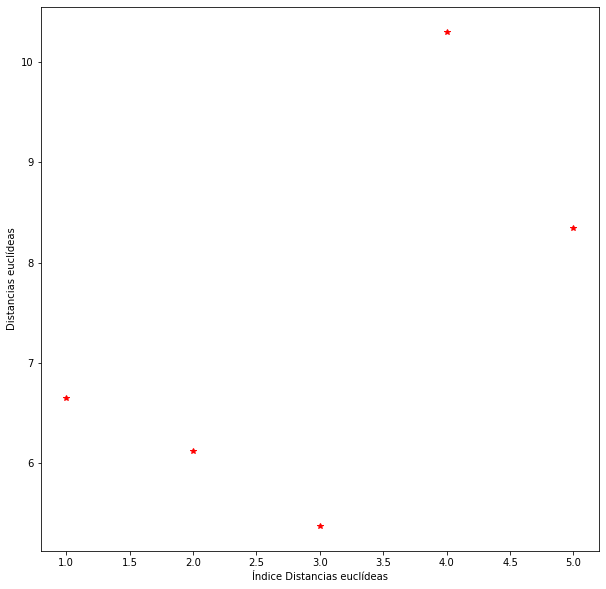

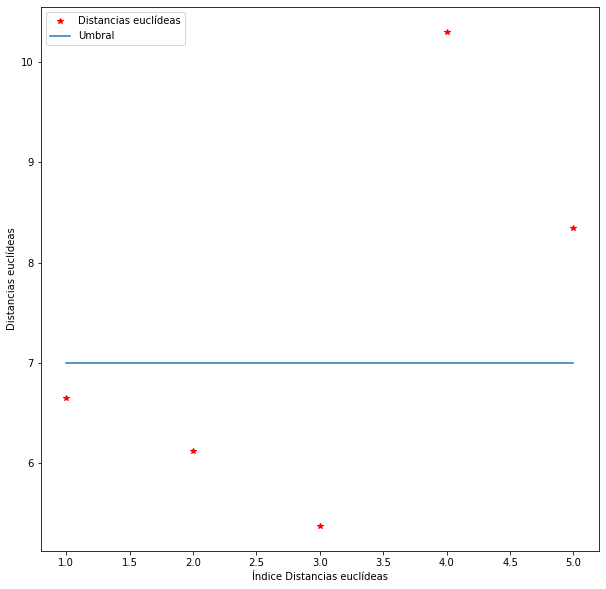

Resultados con algoritmo de las distancias encadenadas

[[1.2395652821239027, 1.3115135795406563, -0.4345493782352009, -0.2564888485391271, -1.0734653467026818, -0.08793609016906556, 0.21509412427356045, -0.3888978464696269, -0.46755420253220814, 0.7325974320445621, 0.7354866311029955, 0.3920060373344887, 2.039031710426366, 2.116949778906616, 2.0797750145403398, 2.095183905460219, 0.6978631577988565, 0.6178215519318968, 0.028731146210250413, 0.0829968831994341, 0.23488226452939287, 0.2896660448220669, 0.18496789892856502, -0.615623129863744, -0.3715311560688075, -0.460462559856923, -0.36747239147359567, -0.3351434650182584, 0.028731146210250413, 0.29858349945886564, 0.9246609064108555, 0.4344189898662112], [1.2395652821239027, 1.3115135795406563, -1.0185837425833109, -0.9343522339639629, 0.9441321724011531, 0.8265992475892192, -1.0454574877482359, 0.6907290108938144, 0.9747782690824289, 0.6993335072757816, -1.1516085868115447, 0.6053091554638295, 0.15799815451353538, 0.0195515947717033

In [24]:
clasesAlgoritmoDistanciasEncadenadasN1=algoritmoDistanciasEncadenadas(caracteristicasEstandarizadas)

print('Resultados con algoritmo de las distancias encadenadas')
for clusters in clasesAlgoritmoDistanciasEncadenadasN1:
    print(f'\n{clusters}')

print(f'Clases formadas: {len(clasesAlgoritmoDistanciasEncadenadasN1)}')

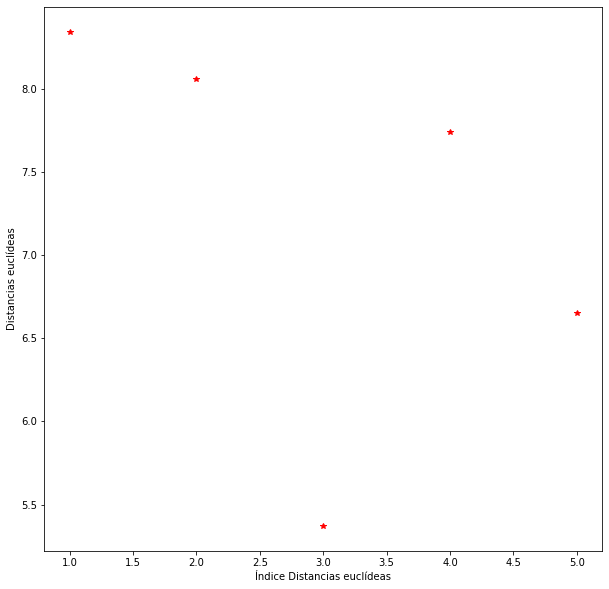

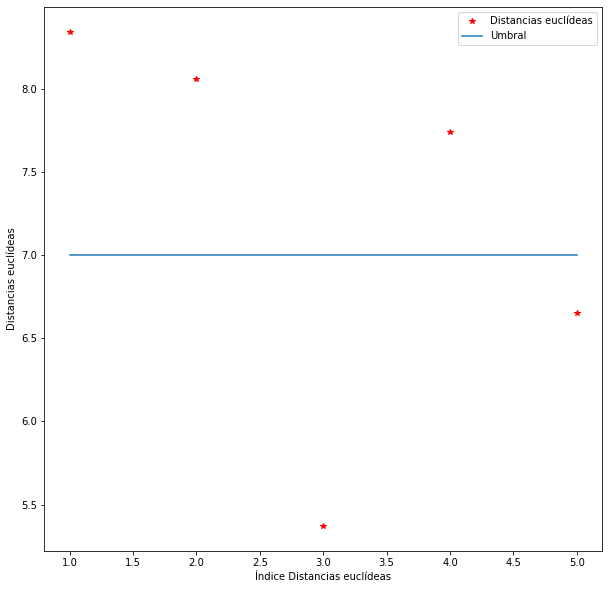

Resultados con algoritmo de las distancias encadenadas

[[-0.1068590760451642, -0.21291966707413135, 1.0046781624797843, 1.4839711951192354, 1.0475987118423755, 1.1783436082654832, 1.3555932018170909, 1.2827824488027981, 0.9902754707347103, 1.0140200056010773, 1.2869256326561507, 1.1692870185642708, -0.37596870206112243, -0.4376591937767511, -0.12483447464988995, -0.4072845245359389, 0.6978631577988565, 0.6178215519318968, 1.0754868730571463, 0.5267655841856209, 0.48384415937165004, 1.954968920315387, 2.0430860534808346, 1.5206344424966054, 2.198882379634025, 2.2328863599210904, 2.233873821857221, 2.182779880669935, 1.0754868730571463, 1.32200756743562, -0.3362403296039478, -2.08691475523964]]

[[-0.31202850205187915, -0.21291966707413135, 1.6512876372937633, 1.2641236106571263, 0.3233329357538195, 0.6507270672510876, 1.1154881328605581, 0.6559023380756388, 0.18941952024888042, 0.2794764377220167, 0.8641859999802821, 0.3757356378214256, -0.6772997904056086, -0.8867186611447391, -0.4950

In [25]:
clasesAlgoritmoDistanciasEncadenadasN2=algoritmoDistanciasEncadenadas(caracteristicasEstandarizadas)

print('Resultados con algoritmo de las distancias encadenadas')
for clusters in clasesAlgoritmoDistanciasEncadenadasN2:
    print(f'\n{clusters}')

print(f'Clases formadas: {len(clasesAlgoritmoDistanciasEncadenadasN2)}')

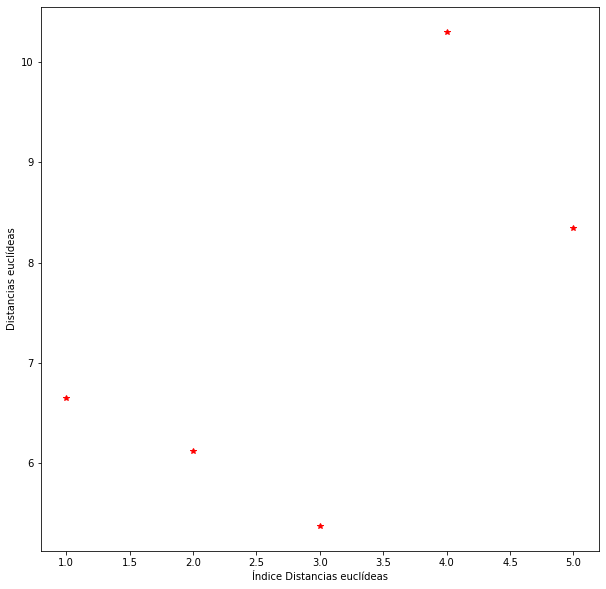

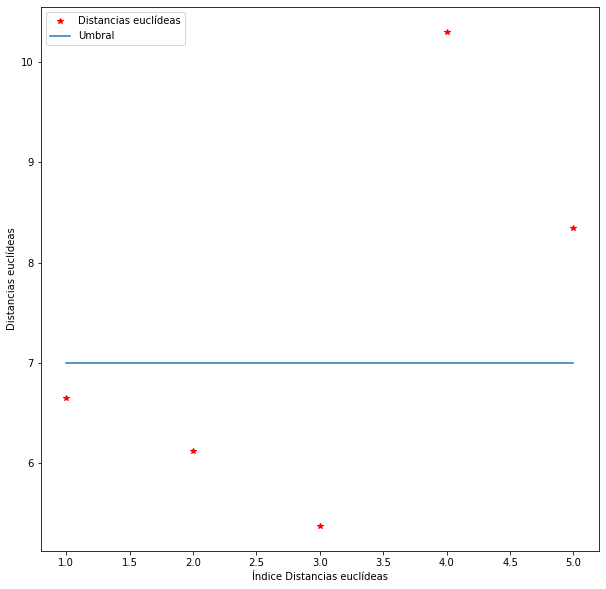

Resultados con algoritmo de las distancias encadenadas

[[1.2395652821239027, 1.3115135795406563, -0.4345493782352009, -0.2564888485391271, -1.0734653467026818, -0.08793609016906556, 0.21509412427356045, -0.3888978464696269, -0.46755420253220814, 0.7325974320445621, 0.7354866311029955, 0.3920060373344887, 2.039031710426366, 2.116949778906616, 2.0797750145403398, 2.095183905460219, 0.6978631577988565, 0.6178215519318968, 0.028731146210250413, 0.0829968831994341, 0.23488226452939287, 0.2896660448220669, 0.18496789892856502, -0.615623129863744, -0.3715311560688075, -0.460462559856923, -0.36747239147359567, -0.3351434650182584, 0.028731146210250413, 0.29858349945886564, 0.9246609064108555, 0.4344189898662112], [1.2395652821239027, 1.3115135795406563, -1.0185837425833109, -0.9343522339639629, 0.9441321724011531, 0.8265992475892192, -1.0454574877482359, 0.6907290108938144, 0.9747782690824289, 0.6993335072757816, -1.1516085868115447, 0.6053091554638295, 0.15799815451353538, 0.0195515947717033

In [26]:
clasesAlgoritmoDistanciasEncadenadasN3=algoritmoDistanciasEncadenadas(caracteristicasEstandarizadas)

print('Resultados con algoritmo de las distancias encadenadas')
for clusters in clasesAlgoritmoDistanciasEncadenadasN3:
    print(f'\n{clusters}')

print(f'Clases formadas: {len(clasesAlgoritmoDistanciasEncadenadasN3)}')

In [35]:
# Estudio de asignación de clases

imagenesOrdenadas=['Monilia','Monilia','Phytophthora','Phytophthora','Sana','Sana']
imagenesClasificadas=[]
auxImagenesClasificadas=[]


for lisClasesAlgoritmoDistanciasEncadenadasN1 in clasesAlgoritmoDistanciasEncadenadasN1:
    for eleClasesAlgoritmoDistanciasEncadenadasN1 in lisClasesAlgoritmoDistanciasEncadenadasN1:
        for i in range(len(caracteristicasEstandarizadas)):
            # Comparacíon de arrays [16]
            if np.all(caracteristicasEstandarizadas[i]==eleClasesAlgoritmoDistanciasEncadenadasN1):
                auxImagenesClasificadas.append(imagenesOrdenadas[i])

    imagenesClasificadas.append(auxImagenesClasificadas)
    auxImagenesClasificadas=[]

print('Clasificación primera iteración')
for lisImagenesClasificadas in imagenesClasificadas:
    print(lisImagenesClasificadas)


imagenesClasificadas=[]
auxImagenesClasificadas=[]


for lisClasesAlgoritmoDistanciasEncadenadas in clasesAlgoritmoDistanciasEncadenadasN2:
    for eleClasesAlgoritmoDistanciasEncadenadas in lisClasesAlgoritmoDistanciasEncadenadas:
        for i in range(len(caracteristicasEstandarizadas)):
            if np.all(caracteristicasEstandarizadas[i]==eleClasesAlgoritmoDistanciasEncadenadas):
        
                auxImagenesClasificadas.append(imagenesOrdenadas[i])

    imagenesClasificadas.append(auxImagenesClasificadas)
    auxImagenesClasificadas=[]

print('Clasificación segunda iteración')
for lisImagenesClasificadas in imagenesClasificadas:
    print(lisImagenesClasificadas)

imagenesClasificadas=[]
auxImagenesClasificadas=[]


for lisClasesAlgoritmoDistanciasEncadenadas in clasesAlgoritmoDistanciasEncadenadasN3:
    for eleClasesAlgoritmoDistanciasEncadenadas in lisClasesAlgoritmoDistanciasEncadenadas:
        for i in range(len(caracteristicasEstandarizadas)):
            if np.all(caracteristicasEstandarizadas[i]==eleClasesAlgoritmoDistanciasEncadenadas):
        
                auxImagenesClasificadas.append(imagenesOrdenadas[i])

    imagenesClasificadas.append(auxImagenesClasificadas)
    auxImagenesClasificadas=[]

print('Clasificación tercera iteración')
for lisImagenesClasificadas in imagenesClasificadas:
    print(lisImagenesClasificadas)



Clasificación primera iteración
['Phytophthora', 'Sana', 'Sana', 'Phytophthora']
['Monilia', 'Monilia']
Clasificación segunda iteración
['Monilia']
['Monilia', 'Sana', 'Phytophthora']
['Sana', 'Phytophthora']
Clasificación tercera iteración
['Phytophthora', 'Sana', 'Sana', 'Phytophthora']
['Monilia', 'Monilia']


Con la clasificación mediante distancias encadenadas y con un umbral de 7 se logró separar el 66.6% los cacaos enfermos de los sanos.

### Función K-Means

funcion cv2.kmeans(data, K, bestLabels, criteria, attempts, flags) → retval, bestLabels, centers

https://docs.opencv.org/4.x/d1/d5c/tutorial_py_kmeans_opencv.html

metodo usado: 
https://github.com/jbagnato/machine-learning/blob/master/Ejercicio_K_Means.ipynb

In [50]:
## Funcion K-MEANS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

data = pd.DataFrame(caracteristicasEstandarizadas, columns = aux_nombre_caracteristicas)
data

,Moda R,Moda G,Moda B,Moda Gris,Mediana R,Mediana G,Mediana B,Mediana Gris,Media R,Media G,...,MomentosHU2,MomentosHU3,MomentosHU4,MomentosHU5,MomentosHU6,MomentosHU7,Area,Perimetro,CentroideX,CentroideY
0,-0.312029,-0.212920,1.651288,1.264124,0.323333,0.650727,1.115488,0.655902,0.189420,0.279476,...,-0.009955,-0.877565,-0.589743,-0.480322,-0.483913,-0.311967,1.541694,1.111403,1.681202,-0.025554
1,-0.106859,-0.212920,1.004678,1.483971,1.047599,1.178344,1.355593,1.282782,0.990275,1.014020,...,2.043086,1.520634,2.198882,2.232886,2.233874,2.182780,1.075487,1.322008,-0.336240,-2.086915
2,1.239565,1.311514,-0.434549,-0.256489,-1.073465,-0.087936,0.215094,-0.388898,-0.467554,0.732597,...,0.184968,-0.615623,-0.371531,-0.460463,-0.367472,-0.335143,0.028731,0.298583,0.924661,0.434419
3,-1.619984,-1.264993,-0.997725,-0.622901,-1.616665,-1.600437,-1.285563,-1.747138,-1.937038,-1.640124,...,-1.012774,-0.428695,-0.573070,-0.480981,-0.484862,-0.311978,-1.046963,-1.278265,-0.189135,0.894392
4,1.239565,1.311514,-1.018584,-0.934352,0.944132,0.826599,-1.045457,0.690729,0.974778,0.699334,...,-0.742970,1.266992,-0.077446,-0.330786,-0.412466,-0.911668,-0.585899,-0.382408,-1.092781,0.809212
5,-0.440259,-0.932195,-0.205107,-0.934352,0.375066,-0.967297,-0.355155,-0.493378,0.250119,-1.085304,...,-0.462356,-0.865743,-0.587092,-0.480334,-0.485160,-0.312023,-1.013051,-1.071322,-0.987706,-0.025554


In [47]:
data.describe()


,Moda R,Moda G,Moda B,Moda Gris,Mediana R,Mediana G,Mediana B,Mediana Gris,Media R,Media G,...,MomentosHU2,MomentosHU3,MomentosHU4,MomentosHU5,MomentosHU6,MomentosHU7,Area,Perimetro,CentroideX,CentroideY
count,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000,6.000000e+00,...,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000e+00,6.000000,6.000000e+00,6.000000e+00,6.000000e+00
mean,-7.401487e-17,-2.035409e-16,-7.401487e-17,3.700743e-17,-2.960595e-16,2.590520e-16,1.480297e-16,-1.850372e-16,0.000000,4.440892e-16,...,3.700743e-17,3.700743e-17,-9.251859e-17,-3.700743e-17,-9.251859e-18,-8.326673e-17,0.000000,-3.700743e-17,-2.220446e-16,1.480297e-16
std,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445,1.095445e+00,...,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445e+00,1.095445,1.095445e+00,1.095445e+00,1.095445e+00
min,-1.619984e+00,-1.264993e+00,-1.018584e+00,-9.343522e-01,-1.616665e+00,-1.600437e+00,-1.285563e+00,-1.747138e+00,-1.937038,-1.640124e+00,...,-1.012774e+00,-8.775646e-01,-5.897428e-01,-4.809808e-01,-4.851599e-01,-9.116680e-01,-1.046963,-1.278265e+00,-1.092781e+00,-2.086915e+00
25%,-4.082017e-01,-7.523758e-01,-8.569314e-01,-8.564895e-01,-7.242658e-01,-7.474568e-01,-8.728820e-01,-4.672579e-01,-0.303311,-7.441085e-01,...,-6.728162e-01,-8.032132e-01,-5.835866e-01,-4.803313e-01,-4.846250e-01,-3.293633e-01,-0.906263,-8.990933e-01,-8.248396e-01,-2.555406e-02
50%,-2.094438e-01,-2.129197e-01,-3.198283e-01,-4.396952e-01,3.491996e-01,2.813955e-01,-7.003065e-02,1.335022e-01,0.219769,4.894050e-01,...,-2.361553e-01,-5.221592e-01,-4.723005e-01,-4.703925e-01,-4.481896e-01,-3.120007e-01,-0.278584,-4.191233e-02,-2.626878e-01,2.044325e-01
75%,9.029592e-01,9.304053e-01,7.022318e-01,8.839705e-01,8.018657e-01,7.826312e-01,8.903896e-01,6.820223e-01,0.793613,7.242815e-01,...,1.362372e-01,8.430701e-01,-1.509675e-01,-3.632054e-01,-3.787208e-01,-3.119699e-01,0.813798,9.081984e-01,6.462119e-01,7.155136e-01
max,1.239565e+00,1.311514e+00,1.651288e+00,1.483971e+00,1.047599e+00,1.178344e+00,1.355593e+00,1.282782e+00,0.990275,1.014020e+00,...,2.043086e+00,1.520634e+00,2.198882e+00,2.232886e+00,2.233874e+00,2.182780e+00,1.541694,1.322008e+00,1.681202e+00,8.943920e-01


/tmp/ipykernel_5903/3959311155.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(['Mediana R'],1).hist()


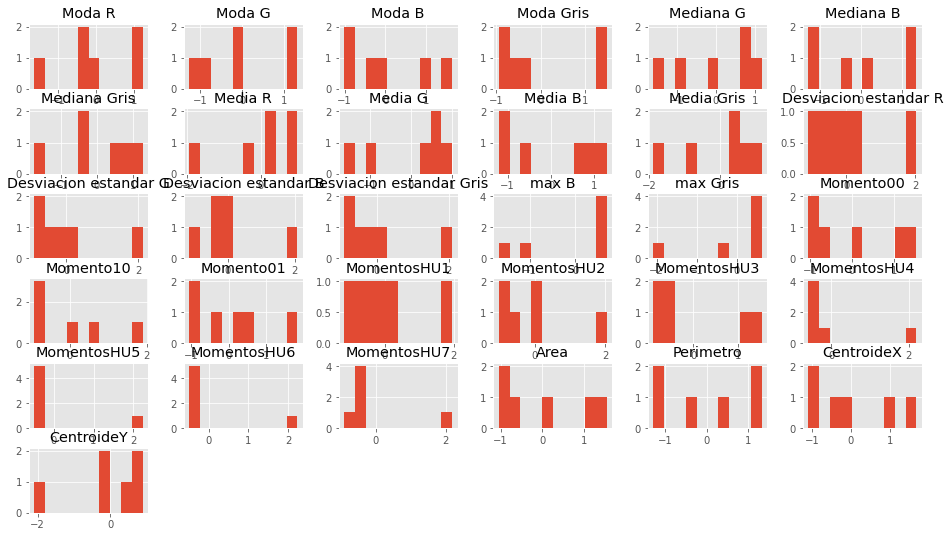

In [48]:
#caracteristica de clasificacion
data.drop(['Mediana R'],1).hist()
plt.show()

/home/esteban/.local/lib/python3.8/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


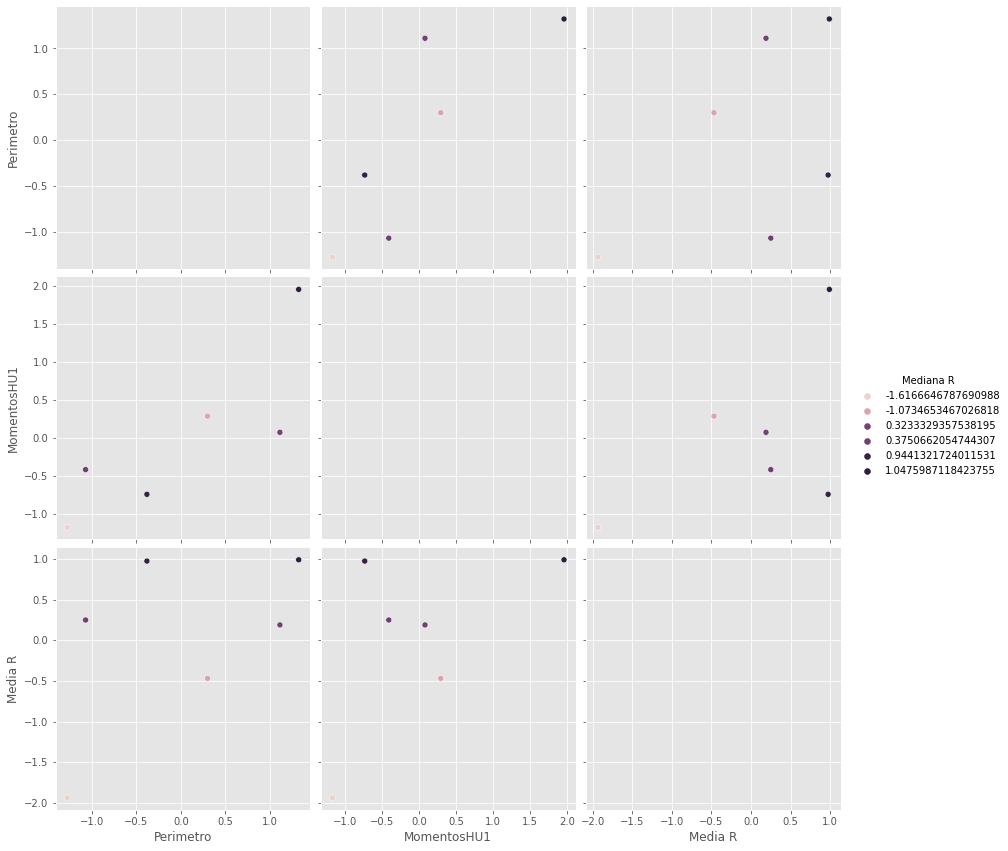

In [51]:
sb.pairplot(data.dropna(), hue='Mediana R',size=4,vars=["Perimetro","MomentosHU1","Media R"],kind='scatter')

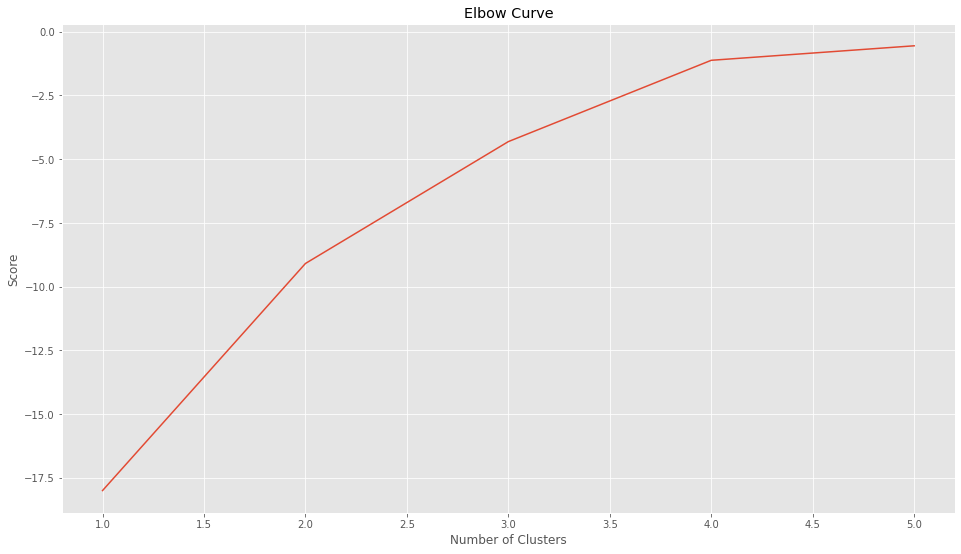

In [52]:
#Para el ejercicio, sólo seleccionamos 3 dimensiones, para poder graficarlo
X = np.array(data[["Perimetro","MomentosHU1","Media R"]])
y = np.array(data['Mediana R'])
#Hallar el valor de K
Nc = range(1, 6)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [53]:
kmeans = KMeans(n_clusters=4).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[-1.27826462 -1.17265145 -1.93703787]
 [ 0.70499342  0.18345019 -0.13906734]
 [ 1.32200757  1.95496892  0.99027547]
 [-0.7268649  -0.57460893  0.61244854]]


In [54]:
# Obtenemos las etiquetas de cada punto de nuestros datos
labels = kmeans.predict(X)
# Obtenemos los centroids
C = kmeans.cluster_centers_
labels


array([1, 2, 1, 0, 3, 3], dtype=int32)

### K-Vecinos
funcion cv2.k-Nearest Neighbor

metodo usado: 
https://github.com/jbagnato/machine-learning/blob/master/Ejercicio_k-NearestNeighbor.ipynb

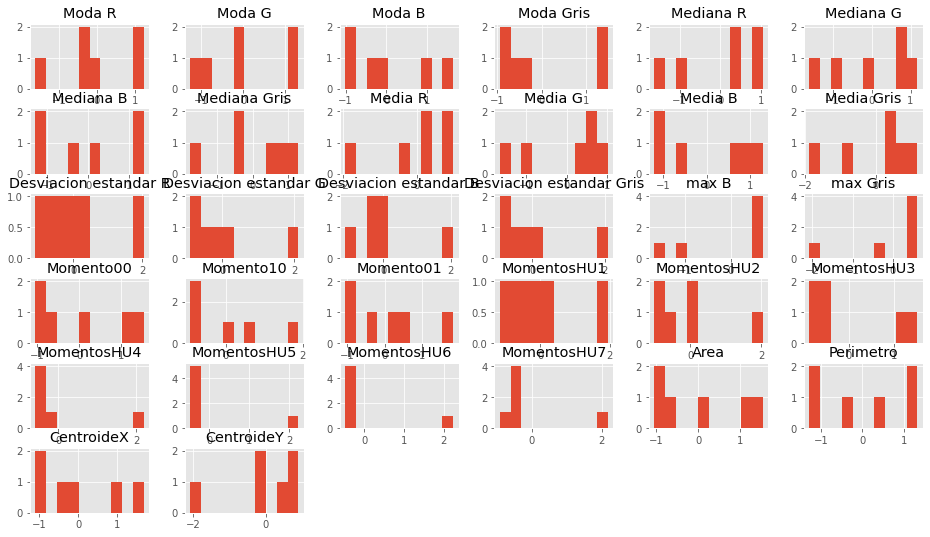

In [55]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

data.hist()
plt.show()

/home/esteban/.local/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/esteban/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


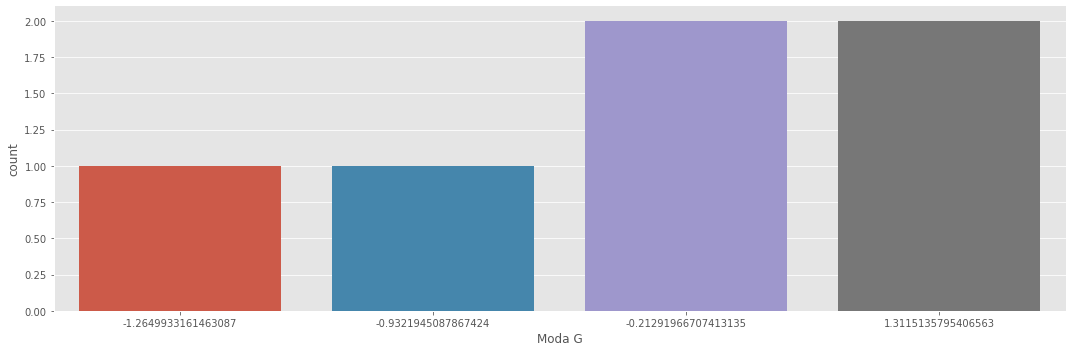

In [56]:
sb.factorplot('Moda G',data=data,kind="count", aspect=3)

/home/esteban/.local/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/esteban/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


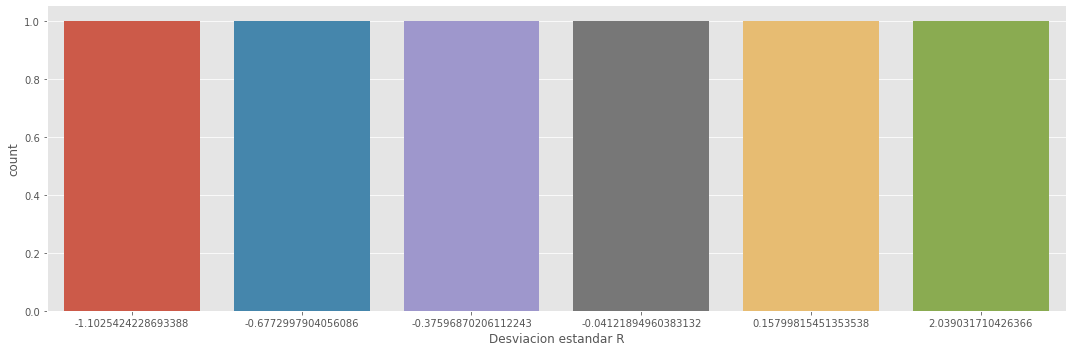

In [57]:
sb.factorplot('Desviacion estandar R',data=data,kind="count", aspect=3)

In [58]:


X = data[['Desviacion estandar R','Desviacion estandar G']].values
y = data['Moda G'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n_neighbors = 4

knn = KNeighborsClassifier(n_neighbors)

### Clasificador Bayesiano

Las funciones que se van a usar son:

Se crea un modelo de tipo StatModel vacio para ser entrenado [17]
```
cv.ml.NormalBayesClassifier_create(		) -> 	retval
```

Método train del objeto StatModel [17]
```
cv.ml.StatModel.train(	samples, layout, responses	) -> 	retval
```

Donde,
* samples: Muestras de entrenamiento
* layout: Especifica si las características están en filas o columnas [18]

|Bandera | Especificación |
| --- | --- |
| cv2.ml.ROW_SAMPLE| las características están en filas|
| cv2.ml.COL_SAMPLE| las características están en columnas|

* responses: Vector de respuestas asociadas con el vector de entrenamiento

Predice las respuestas para un número determinado de muestras [17]
```
cv.ml.StatModel.predict(samples[, results[, flags]]	) -> retval,results
```

Donde, 

* samples: Vector de muestras en puntos flotantes.
* results y flags: Son opcionales

En este proyecto se va a utilizar solo para identificar si el cacao está o no enfermo.

In [61]:
# Tomado de [19]
samples = caracteristicasEstandarizadas
responses = np.array([0, 0, 0, 0, 1, 1])
samples = np.float32(samples)
#responses = np.float32(responses)
#a = 0 # Vectores de característica en fila

print ("Muestras")
print (samples)
print ("Clases")
print (responses)
layout=cv2.ml.ROW_SAMPLE

# Creación del clasificador
Clasificador_NB = cv2.ml.NormalBayesClassifier_create()

# Entrenamiento
Clasificador_NB.train(samples, layout, responses)

# Evaluación con muestras de entrenamiento
retval, results = Clasificador_NB.predict(samples)

print ("Clase salida")
print (results.ravel())


Muestras
[[-3.1202850e-01 -2.1291967e-01  1.6512877e+00  1.2641236e+00
   3.2333294e-01  6.5072709e-01  1.1154882e+00  6.5590233e-01
   1.8941952e-01  2.7947643e-01  8.6418599e-01  3.7573564e-01
  -6.7729980e-01 -8.8671869e-01 -4.9500409e-01 -7.8331500e-01
  -1.1165811e+00 -2.0781271e+00  1.5416945e+00  1.8942895e+00
   1.8265702e+00  7.7234343e-02 -9.9549396e-03 -8.7756455e-01
  -5.8974278e-01 -4.8032233e-01 -4.8391318e-01 -3.1196707e-01
   1.5416945e+00  1.1114033e+00  1.6812017e+00 -2.5554059e-02]
 [-1.0685907e-01 -2.1291967e-01  1.0046781e+00  1.4839712e+00
   1.0475987e+00  1.1783437e+00  1.3555932e+00  1.2827824e+00
   9.9027544e-01  1.0140200e+00  1.2869257e+00  1.1692870e+00
  -3.7596869e-01 -4.3765920e-01 -1.2483448e-01 -4.0728453e-01
   6.9786316e-01  6.1782157e-01  1.0754869e+00  5.2676558e-01
   4.8384416e-01  1.9549689e+00  2.0430861e+00  1.5206344e+00
   2.1988823e+00  2.2328863e+00  2.2338738e+00  2.1827798e+00
   1.0754869e+00  1.3220075e+00 -3.3624032e-01 -2.0869148e+0

Como se puede observar, la evalación con las muestras de entrenamiento dieron resultados satisfactorios en todos los casos. 

Referencias

[1] S. Serrano, «Cocoa Diseases (YOLOv4)», 23 de octubre de 2020. https://www.kaggle.com/serranosebas/enfermedades-cacao-yolov4 (accedido 15 de mayo de 2022).


[2] D. Vargas Medina, Representación de Imágenes - Técnicas de Inteligencia Artificial - Visión de Máquina. Bogotá DC: Universidad Nacional de Colombia, 2022.

[3] D. Vargas Medina, «Reconocimiento de Patrones - Generalidades -Técnicas de Inteligencia Artificial: Visión de Máquina», Universidad Nacional de Colombia, 21 de abril de 2022.


[4] D. Vargas Medina, Reconocimiento de patrones - Generalidades - Técnicas de Inteligencia Artificial - Visión de Máquina. Bogotá DC: Universidad Nacional de Colombia, 2022.

[5] «NumPy: Remove dimensions of size 1 from ndarray (np.squeeze) | note.nkmk.me», 24 de septiembre de 2020. https://note.nkmk.me/en/python-numpy-squeeze/ (accedido 15 de mayo de 2022).



[6] D. Vargas Medina, «Métodos no Supervisados (clustering) - Técnicas de Inteligencia Artificial: Visión de Máquina», Universidad Nacional de Colombia, 10 de mayo de 2022.

[7] NumPy, «numpy.random.randint — NumPy v1.22 Manual». https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html (accedido 16 de mayo de 2022).


[8] programador clic, «Python Numpy calcula varias distancias - programador clic». https://programmerclick.com/article/87201087090/ (accedido 16 de mayo de 2022).


[9] D. Rodríguez, «Numpy básico: como añadir elementos en arrays de Numpy con np.append()», Analytics Lane, 27 de noviembre de 2019. https://www.analyticslane.com/2019/11/27/numpy-basico-como-anadir-elementos-en-arrays-de-numpy-con-np-append/ (accedido 16 de mayo de 2022).


[10] Python, «8. Errores y excepciones — documentación de Python - 3.8.13». https://docs.python.org/es/3.8/tutorial/errors.html (accedido 16 de mayo de 2022).


[11] «Entradas en Python. Usa input() para leer datos en Python». https://www.programarya.com/Cursos/Python/entrada-y-lectura-de-datos (accedido 16 de mayo de 2022).

[12] Python, «6. Expressions — Python 3.8.13 documentation», 6. Expressions, 17 de marzo de 2022. https://docs.python.org/3.8/reference/expressions.html (accedido 16 de mayo de 2022).

[13] Emory College of Arts And Sciences, «Python Operator Precedence», 3 de noviembre de 2010. https://www.mathcs.emory.edu/~valerie/courses/fall10/155/resources/op_precedence.html (accedido 16 de mayo de 2022).


[14] Pankaj, «Python - Convert NumPy Array to List», JournalDev. https://www.journaldev.com/32797/python-convert-numpy-array-to-list (accedido 16 de mayo de 2022).


[15] D. Vargas Medina, Aprendizaje NO Supervisado - Técnicas de Inteligencia Artificial - Visión de Máquina. Bogotá DC: Universidad Nacional de Colombia, 2022.


[16] L. Ankit, «np.all: How to Use Numpy all() Function in Python», AppDividend, 17 de febrero de 2022. https://appdividend.com/2022/02/17/np-all/ (accedido 17 de mayo de 2022).


[17] «OpenCV: cv::ml::NormalBayesClassifier Class Reference». https://docs.opencv.org/4.x/d4/d8e/classcv_1_1ml_1_1NormalBayesClassifier.html (accedido 17 de mayo de 2022).


[18] «OpenCV: Machine Learning». https://docs.opencv.org/4.x/dd/ded/group__ml.html#ga9c57a2b823008dda53d2c7f7059a8710 (accedido 17 de mayo de 2022).

[19] D. Vargas Medina, Aprendizaje Supervisado - Técnicas de Inteligencia Artificial - Visión de Máquina. Bogotá DC: Universidad Nacional de Colombia, 2022.
